# Aula 7 - métodos de ensemble

Na aula de hoje, vamos explorar os seguintes tópicos em Python:

- 1) Métodos de ensemble
- 2) Bagging & Random Forest
- 3) Boosting & AdaBoost

_________________

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# desabilita os warnings
import warnings
warnings.filterwarnings('ignore')
pd.options.display.max_rows = 70
pd.options.display.max_columns = 30
from sklearn.model_selection import train_test_split

____
____
____

## 1) Métodos de Ensemble


Há uma classe de algoritmos de Machine Learning, os chamados **métodos de ensemble** que tem como objetivo **combinar as predições de diversos estimadores mais simples** para gerar uma **predição final mais robusta**

Os métodos de ensemble costuman ser divididos em duas classes:

- **Métodos de média**: têm como procedimento geral construir diversos estimadores independentes, e tomar a média de suas predições como a predição final. O principal objetivo do método é reduzir **variância**, de modo que o modelo final seja melhor que todos os modelos individuais. Ex.: **random forest.**
<br>

- **Métodos de boosting**: têm como procedimento geral a construção de estimadores de forma sequencial, de modo que estimadores posteriores tentam reduzir o **viés** do estimador conjunto, que leva em consideração estimadores anteriores. Ex.: **adaboost**.

Há, ainda, uma terceira classe de método de ensemble, o chamado [stacking ensemble](https://machinelearningmastery.com/stacking-ensemble-machine-learning-with-python/), que consiste em "empilhar" modelos de modo a produzir a mistura. Não veremos esta modalidade em detalhes, mas deixo como sugestão para estudos posteriores! :)

Para mais detalhes sobre métodos de ensemble no contexto do sklearn, [clique aqui!](https://scikit-learn.org/stable/modules/ensemble.html)

Na aula de hoje, vamos conhecer em detalhes os procedimentos de bagging e boosting, ilustrados pelos métodos Random Forest e AdaBoost, respectivamente. Vamos lá!

_________
_______
_________

## 2) Bagging & Random Forest

Uma técnica muito interessante (e muito performática!) baseada em árvores é o **Random Forest**.

Neste método, são criadas varias **árvores diferentes e independentes entre si**, através de um processo **aleatório**, e a predição final é tomada através da média das predições individuais!

<img src="https://i.ytimg.com/vi/goPiwckWE9M/maxresdefault.jpg" width=700>

O Random Forest utiliza os conceitos de **bootstrapping** e **aggregation** (ou então, o procedimento composto **bagging**) para criar um modelo composto que é melhor que uma única árvore!

<img src="https://c.mql5.com/2/33/image1__1.png" width=600>

Vamos entrender um pouco melhor cada componente do método!

### Bootstrapping

O procedimento de **bootstrapping** é utilizado no contexto do random forest para gerar os chamados **bootstrapped datasets**.

A ideia é bem simples! Para a criação de cada bootstrapped dataset, primeiro:

> Selecionamos **aleatoriamente com reposição** algumas linhas da base original. Isso gera um novo dataset (reamostrado), chamado de **bootstrapped dataset**. O número de linhas do dataset reamostrado é controlável.

Logo após, fazemos uma árvore de decisão **treinada neste dataset reamostrado**. Mas, com um detalhe:

> Usamos apenas um **subconjunto aleatório das features** em cada avaliação de quebras (isso equivale ao `splitter="random"`). A quantidade de features a serem consideradas é controlável.

Com isso, muitas árvores são geradas (a quantidade também é controlável), cada uma seguindo o procedimento de bootstrap!

Note que o o procedimento de bootstrapping introduz **duas fontes de aleatoriedade**, cujo objetivo é **diminuir a variância** (tendência a overfitting) do modelo.

De fato, árvores individuais são facilmente overfitadas, como discutimos em aula (lembre-se da grande flexibilidade da hipótese em encontrar condições favoráveis à aprendizagem dos ruídos!).

Com esta aleatorização introduzida pelo bootstrapping, o objetivo é que as árvores construídas sejam **independentes**, de modo que **os erros cometidos por cada uma sejam independentes**. 

Deste modo, se considerarmos as previsões isoladas e de alguma forma **agregar** as previsões, a expectativa é que o modelo final seja **menos propenso a overfitting**! Mas, uma pergunta natural é: o que é essa "agragação"? Aqui entra o segundo elemento do bagging...

### Aggregation

Entendemos como o bootstrap é utilizado para gerar várias árvores independentes. 

Então, quando temos uma nova observação para atribuir o target, passamos as features **por cada uma das árvores**, e, naturalmente, cada árvore produz **o seu target**, que pode muito bem não ser o mesmo!

A **agregação** é utilizada para tomar a decisão final:

> No caso de classificação, a classe final é atribuída como **a classe majoritária**, isso é, **a classe que foi o output $\hat{y}$ mais vezes dentre todas as árvores**;

> No caso de regressão, o valor final é atribuído como **a média dos valores preditos $\hat{y}$ por cada árvore**.

Note que em ambos os casos, o procedimento de agregação pode ser visto como uma **média**, e o sklearn deixa isso explícito: "*In contrast to the original publication, the scikit-learn implementation combines classifiers by averaging their probabilistic prediction, instead of letting each classifier vote for a single class.*"

Tomando a média como procedimento de agregação, a expectativa é que **alguns erros sejam anulados**, garantindo uma previsão final **mais estável e mais generalizável**, dado que os ruídos são eliminados.

Juntando o bootstrapping com o aggregation, temos então o...

### Bagging

> Bagging: **b**ootstrap **agg**regat**ing**

Esquematicamente:

<img src=https://media.geeksforgeeks.org/wp-content/uploads/20210707140912/Bagging.png width=500>

As classes do random forest são:

- [RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html#sklearn.ensemble.RandomForestClassifier)

- [RandomForestRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)

Ambos os métodos têm hiperparâmetros similares aos hiperparâmetros das árvores convencionais, aplicados a cada uma das árvores independentes.

Além destes, há dois hiperparâmetros bem importantes, referentes ao método de ensemble em si:

- `n_estimators` : controla quantas árvores independentes serão construídas (i.e., o número de árvores na floresta). Em geral, quanto mais árvores melhor (mas mais tempo vai demorar). Além disso, depois de uma determinade quantidade de árvores, os resultados vão parar de melhorar, pois há um limite para o bootstrap: depois de uma certa quantidade, as árvores deixam de ser tão independentes assim...
<br>

- `max_features`: o número de features no subconjunto aleatório de candidata a serem utilizadas em cada quebra. Quanto menor for o valor, mais conseguimos reduzir o overfitting, mas o underfitting é favorecido. Uma boa heurística é `max_features=None` para regressão e `max_features="sqrt"`para classificação, embora estratégias diferentes podem (e devem) ser testadas com o CV.


___

Para uma explicação bem visual sobre o funcionamento deste método, sugiro os vídeos do canal [StatQuest](https://www.youtube.com/watch?v=J4Wdy0Wc_xQ). 

Obs.: toda a [playlist de machine learning](https://www.youtube.com/playlist?list=PLblh5JKOoLUICTaGLRoHQDuF_7q2GfuJF) é muitíssimo interessante, com vídeos super claros e ilustrativos! Além disso, há outros vídeos de estatística que são muito bons! Este é um dos melhores canais no youtube para se aprender de forma clara e descontraída sobre estatística e machine learning!

_____________

Agora, vamos ver o Random Forest em ação!

Modelo baseline de Random Forest (dropando NaNs e features categóricas):

In [21]:
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

from sklearn.impute import SimpleImputer

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, StratifiedKFold, train_test_split

from sklearn.pipeline import Pipeline

from sklearn.metrics import ConfusionMatrixDisplay, classification_report

In [3]:
from sklearn.ensemble import RandomForestClassifier

In [4]:
df = pd.read_csv("breast_cancer.csv")

X = df.drop(columns=["diagnosis", 'id'])
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y)

In [14]:
df = pd.read_csv("breast_cancer.csv")

X = df.drop(columns=["diagnosis", 'id'])
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y) 
## Utilizamos quando há desbalanceamento
## Desbalanceamento -> Distribuição mais "enviesada" do que um 60% - 40%

# ====================

# argumento: um lista de tuplas do tipo [("nome da estrutura", classe instanciada da estrutura)]
# na sequencia em que as estruturas (procedimentos) são aplicadas
lista_etapas = [("std_scaler", StandardScaler()), 
                ("rf", RandomForestClassifier(n_estimators=3, \
                                                   max_depth=5, \
                                                   random_state=42, \
                                                   n_jobs=-1))]

pipe_rf = Pipeline(lista_etapas).fit(X_train, y_train)



Métricas de avaliação de treino:
[[283   2]
 [  2 168]]


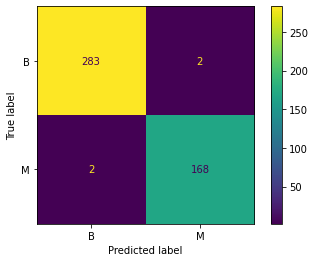

              precision    recall  f1-score   support

           B       0.99      0.99      0.99       285
           M       0.99      0.99      0.99       170

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455


Métricas de avaliação de teste:
[[72  0]
 [ 3 39]]


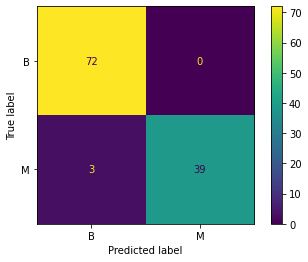

              precision    recall  f1-score   support

           B       0.96      1.00      0.98        72
           M       1.00      0.93      0.96        42

    accuracy                           0.97       114
   macro avg       0.98      0.96      0.97       114
weighted avg       0.97      0.97      0.97       114



In [22]:
# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = pipe_rf.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))


# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = pipe_rf.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

Apesar da boa performance no teste, é evidente que nosso modelo ainda está overfitado!

Isso é algo muito interessante do random forest: apesar de ser possível overfitá-lo, **a variância do erro de generalização vai a zero, conforme mais árvores são adicionadas**:

<img src=https://i.stack.imgur.com/8GU8U.png width=500>

Ou seja, um modelo de random forest **tende a ser mais estável** no que diz respeito à generalização!

Para evitar o overfitting em si, podemos usar as mesmas técnicas de regularização das árvores individuais, e aumentar o número de árvores na floresta:

In [23]:
df = pd.read_csv("breast_cancer.csv")

X = df.drop(columns=["diagnosis", 'id'])
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y) ## Utilizamos quando há desbalanceamento
## Desbalanceamento -> Distribuição mais "enviesada" do que um 60% - 40%

# ====================

# argumento: um lista de tuplas do tipo [("nome da estrutura", classe instanciada da estrutura)]
# na sequencia em que as estruturas (procedimentos) são aplicadas
lista_etapas = [("std_scaler", StandardScaler()), 
                ("rf", RandomForestClassifier(n_estimators=5000, \
                                                   max_depth=5, \
                                                   random_state=42, \
                                                   n_jobs=-1))]

pipe_rf = Pipeline(lista_etapas).fit(X_train, y_train)


In [24]:
from sklearn.metrics import confusion_matrix


Métricas de avaliação de treino:
[[285   0]
 [  4 166]]


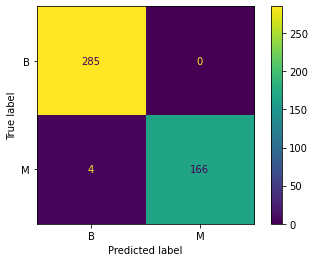

              precision    recall  f1-score   support

           B       0.99      1.00      0.99       285
           M       1.00      0.98      0.99       170

    accuracy                           0.99       455
   macro avg       0.99      0.99      0.99       455
weighted avg       0.99      0.99      0.99       455


Métricas de avaliação de teste:
[[72  0]
 [ 5 37]]


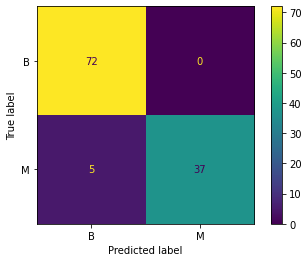

              precision    recall  f1-score   support

           B       0.94      1.00      0.97        72
           M       1.00      0.88      0.94        42

    accuracy                           0.96       114
   macro avg       0.97      0.94      0.95       114
weighted avg       0.96      0.96      0.96       114



In [25]:
# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = pipe_rf.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))


# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = pipe_rf.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

> **DICA**: o random forest é altamente paralelizável! (afinal, as árvores são independentes).
> Por este motivo, vale a pena utilizar o argumento `n_jobs`, para paralelizar e acelerar os cálculos!

Será que dá pra melhorar?? Podemos construir uma pipeline e fazer o grid/random search para buscar o melhor modelo!

## Exercício

1 - façam o grid search, pipeline completa e verifique qual a melhor acuracia e f1 que podemos alcançar com esse estimador

obs: cuidado com o parâmetro n_estimators! se a grade incluir muitas árvores, vai demorar!

1 - Carregue a base

2 - Verifique a necessidade de escalonamento

3 - Crie um pipeline e adicione o escalonamento (se necessário) e o estimador

4 - Defina os parametros de busca no grid search

5 - Faça o fit do modelo e verifique as métricas


In [9]:
from sklearn.metrics import make_scorer, accuracy_score, f1_score, r2_score

In [10]:
df = pd.read_csv("breast_cancer.csv")

X = df.drop(columns=["diagnosis", 'id'])
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y) ## Utilizamos quando há desbalanceamento
## Desbalanceamento -> Distribuição mais "enviesada" do que um 60% - 40%

# ====================

# argumento: um lista de tuplas do tipo [("nome da estrutura", classe instanciada da estrutura)]
# na sequencia em que as estruturas (procedimentos) são aplicadas
lista_etapas = [("std_scaler", StandardScaler()), 
                ("rf", RandomForestClassifier())]

pipe_rf = Pipeline(lista_etapas)

splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

## ====================

metrica = make_scorer(accuracy_score, pos_label="A")

## ====================

param_grid = {"rf__n_estimators" : range(150, 200),
              "rf__max_depth" : range(3, 8),
              "rf__max_features" : range(1, 3)}

grid_rf = GridSearchCV(estimator=pipe_rf, 
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=splitter,
                        verbose=10)


grid_rf.fit(X_train, y_train)


Fitting 10 folds for each of 500 candidates, totalling 5000 fits
[CV 1/10; 1/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=150
[CV 1/10; 1/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=150;, score=nan total time=   0.1s
[CV 2/10; 1/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=150
[CV 2/10; 1/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=150;, score=nan total time=   0.0s
[CV 3/10; 1/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=150
[CV 3/10; 1/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=150;, score=nan total time=   0.0s
[CV 4/10; 1/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=150
[CV 4/10; 1/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=150;, score=nan total time=   0.1s
[CV 5/10; 1/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=150
[CV 5/10; 1/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=150;, score=nan

[CV 5/10; 5/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=154;, score=nan total time=   0.1s
[CV 6/10; 5/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=154
[CV 6/10; 5/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=154;, score=nan total time=   0.1s
[CV 7/10; 5/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=154
[CV 7/10; 5/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=154;, score=nan total time=   0.1s
[CV 8/10; 5/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=154
[CV 8/10; 5/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=154;, score=nan total time=   0.0s
[CV 9/10; 5/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=154
[CV 9/10; 5/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=154;, score=nan total time=   0.1s
[CV 10/10; 5/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=154
[CV 10/10; 5/500] END rf__max_depth=3, rf__m

[CV 9/10; 9/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=158;, score=nan total time=   0.0s
[CV 10/10; 9/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=158
[CV 10/10; 9/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=158;, score=nan total time=   0.1s
[CV 1/10; 10/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=159
[CV 1/10; 10/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=159;, score=nan total time=   0.1s
[CV 2/10; 10/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=159
[CV 2/10; 10/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=159;, score=nan total time=   0.1s
[CV 3/10; 10/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=159
[CV 3/10; 10/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=159;, score=nan total time=   0.1s
[CV 4/10; 10/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=159
[CV 4/10; 10/500] END rf__max_depth=

[CV 3/10; 14/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=163;, score=nan total time=   0.1s
[CV 4/10; 14/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=163
[CV 4/10; 14/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=163;, score=nan total time=   0.1s
[CV 5/10; 14/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=163
[CV 5/10; 14/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=163;, score=nan total time=   0.1s
[CV 6/10; 14/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=163
[CV 6/10; 14/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=163;, score=nan total time=   0.1s
[CV 7/10; 14/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=163
[CV 7/10; 14/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=163;, score=nan total time=   0.1s
[CV 8/10; 14/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=163
[CV 8/10; 14/500] END rf__max_depth

[CV 7/10; 18/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=167;, score=nan total time=   0.1s
[CV 8/10; 18/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=167
[CV 8/10; 18/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=167;, score=nan total time=   0.1s
[CV 9/10; 18/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=167
[CV 9/10; 18/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=167;, score=nan total time=   0.1s
[CV 10/10; 18/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=167
[CV 10/10; 18/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=167;, score=nan total time=   0.1s
[CV 1/10; 19/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=168
[CV 1/10; 19/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=168;, score=nan total time=   0.1s
[CV 2/10; 19/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=168
[CV 2/10; 19/500] END rf__max_dep

[CV 1/10; 23/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=172;, score=nan total time=   0.1s
[CV 2/10; 23/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=172
[CV 2/10; 23/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=172;, score=nan total time=   0.1s
[CV 3/10; 23/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=172
[CV 3/10; 23/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=172;, score=nan total time=   0.1s
[CV 4/10; 23/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=172
[CV 4/10; 23/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=172;, score=nan total time=   0.1s
[CV 5/10; 23/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=172
[CV 5/10; 23/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=172;, score=nan total time=   0.1s
[CV 6/10; 23/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=172
[CV 6/10; 23/500] END rf__max_depth

[CV 4/10; 27/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=176;, score=nan total time=   0.1s
[CV 5/10; 27/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=176
[CV 5/10; 27/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=176;, score=nan total time=   0.1s
[CV 6/10; 27/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=176
[CV 6/10; 27/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=176;, score=nan total time=   0.1s
[CV 7/10; 27/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=176
[CV 7/10; 27/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=176;, score=nan total time=   0.1s
[CV 8/10; 27/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=176
[CV 8/10; 27/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=176;, score=nan total time=   0.1s
[CV 9/10; 27/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=176
[CV 9/10; 27/500] END rf__max_depth

[CV 7/10; 31/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=180;, score=nan total time=   0.1s
[CV 8/10; 31/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=180
[CV 8/10; 31/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=180;, score=nan total time=   0.1s
[CV 9/10; 31/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=180
[CV 9/10; 31/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=180;, score=nan total time=   0.1s
[CV 10/10; 31/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=180
[CV 10/10; 31/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=180;, score=nan total time=   0.1s
[CV 1/10; 32/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=181
[CV 1/10; 32/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=181;, score=nan total time=   0.1s
[CV 2/10; 32/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=181
[CV 2/10; 32/500] END rf__max_dep

[CV 10/10; 35/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=184;, score=nan total time=   0.1s
[CV 1/10; 36/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=185
[CV 1/10; 36/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=185;, score=nan total time=   0.1s
[CV 2/10; 36/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=185
[CV 2/10; 36/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=185;, score=nan total time=   0.1s
[CV 3/10; 36/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=185
[CV 3/10; 36/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=185;, score=nan total time=   0.1s
[CV 4/10; 36/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=185
[CV 4/10; 36/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=185;, score=nan total time=   0.1s
[CV 5/10; 36/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=185
[CV 5/10; 36/500] END rf__max_dept

[CV 3/10; 40/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=189;, score=nan total time=   0.1s
[CV 4/10; 40/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=189
[CV 4/10; 40/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=189;, score=nan total time=   0.1s
[CV 5/10; 40/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=189
[CV 5/10; 40/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=189;, score=nan total time=   0.1s
[CV 6/10; 40/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=189
[CV 6/10; 40/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=189;, score=nan total time=   0.1s
[CV 7/10; 40/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=189
[CV 7/10; 40/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=189;, score=nan total time=   0.1s
[CV 8/10; 40/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=189
[CV 8/10; 40/500] END rf__max_depth

[CV 6/10; 44/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=193;, score=nan total time=   0.1s
[CV 7/10; 44/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=193
[CV 7/10; 44/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=193;, score=nan total time=   0.1s
[CV 8/10; 44/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=193
[CV 8/10; 44/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=193;, score=nan total time=   0.1s
[CV 9/10; 44/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=193
[CV 9/10; 44/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=193;, score=nan total time=   0.1s
[CV 10/10; 44/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=193
[CV 10/10; 44/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=193;, score=nan total time=   0.1s
[CV 1/10; 45/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=194
[CV 1/10; 45/500] END rf__max_dep

[CV 10/10; 48/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=197;, score=nan total time=   0.1s
[CV 1/10; 49/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=198
[CV 1/10; 49/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=198;, score=nan total time=   0.1s
[CV 2/10; 49/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=198
[CV 2/10; 49/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=198;, score=nan total time=   0.1s
[CV 3/10; 49/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=198
[CV 3/10; 49/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=198;, score=nan total time=   0.1s
[CV 4/10; 49/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=198
[CV 4/10; 49/500] END rf__max_depth=3, rf__max_features=1, rf__n_estimators=198;, score=nan total time=   0.1s
[CV 5/10; 49/500] START rf__max_depth=3, rf__max_features=1, rf__n_estimators=198
[CV 5/10; 49/500] END rf__max_dept

[CV 4/10; 53/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=152;, score=nan total time=   0.1s
[CV 5/10; 53/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=152
[CV 5/10; 53/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=152;, score=nan total time=   0.1s
[CV 6/10; 53/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=152
[CV 6/10; 53/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=152;, score=nan total time=   0.1s
[CV 7/10; 53/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=152
[CV 7/10; 53/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=152;, score=nan total time=   0.1s
[CV 8/10; 53/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=152
[CV 8/10; 53/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=152;, score=nan total time=   0.1s
[CV 9/10; 53/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=152
[CV 9/10; 53/500] END rf__max_depth

[CV 8/10; 57/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=156;, score=nan total time=   0.1s
[CV 9/10; 57/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=156
[CV 9/10; 57/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=156;, score=nan total time=   0.1s
[CV 10/10; 57/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=156
[CV 10/10; 57/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=156;, score=nan total time=   0.1s
[CV 1/10; 58/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=157
[CV 1/10; 58/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=157;, score=nan total time=   0.1s
[CV 2/10; 58/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=157
[CV 2/10; 58/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=157;, score=nan total time=   0.1s
[CV 3/10; 58/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=157
[CV 3/10; 58/500] END rf__max_dep

[CV 2/10; 62/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=161;, score=nan total time=   0.1s
[CV 3/10; 62/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=161
[CV 3/10; 62/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=161;, score=nan total time=   0.1s
[CV 4/10; 62/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=161
[CV 4/10; 62/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=161;, score=nan total time=   0.1s
[CV 5/10; 62/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=161
[CV 5/10; 62/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=161;, score=nan total time=   0.1s
[CV 6/10; 62/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=161
[CV 6/10; 62/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=161;, score=nan total time=   0.1s
[CV 7/10; 62/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=161
[CV 7/10; 62/500] END rf__max_depth

[CV 6/10; 66/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=165;, score=nan total time=   0.1s
[CV 7/10; 66/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=165
[CV 7/10; 66/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=165;, score=nan total time=   0.1s
[CV 8/10; 66/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=165
[CV 8/10; 66/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=165;, score=nan total time=   0.1s
[CV 9/10; 66/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=165
[CV 9/10; 66/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=165;, score=nan total time=   0.1s
[CV 10/10; 66/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=165
[CV 10/10; 66/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=165;, score=nan total time=   0.1s
[CV 1/10; 67/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=166
[CV 1/10; 67/500] END rf__max_dep

[CV 10/10; 70/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=169;, score=nan total time=   0.1s
[CV 1/10; 71/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=170
[CV 1/10; 71/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=170;, score=nan total time=   0.1s
[CV 2/10; 71/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=170
[CV 2/10; 71/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=170;, score=nan total time=   0.1s
[CV 3/10; 71/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=170
[CV 3/10; 71/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=170;, score=nan total time=   0.1s
[CV 4/10; 71/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=170
[CV 4/10; 71/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=170;, score=nan total time=   0.1s
[CV 5/10; 71/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=170
[CV 5/10; 71/500] END rf__max_dept

[CV 4/10; 75/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=174;, score=nan total time=   0.1s
[CV 5/10; 75/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=174
[CV 5/10; 75/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=174;, score=nan total time=   0.1s
[CV 6/10; 75/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=174
[CV 6/10; 75/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=174;, score=nan total time=   0.1s
[CV 7/10; 75/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=174
[CV 7/10; 75/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=174;, score=nan total time=   0.1s
[CV 8/10; 75/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=174
[CV 8/10; 75/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=174;, score=nan total time=   0.1s
[CV 9/10; 75/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=174
[CV 9/10; 75/500] END rf__max_depth

[CV 8/10; 79/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=178;, score=nan total time=   0.1s
[CV 9/10; 79/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=178
[CV 9/10; 79/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=178;, score=nan total time=   0.1s
[CV 10/10; 79/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=178
[CV 10/10; 79/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=178;, score=nan total time=   0.1s
[CV 1/10; 80/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=179
[CV 1/10; 80/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=179;, score=nan total time=   0.1s
[CV 2/10; 80/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=179
[CV 2/10; 80/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=179;, score=nan total time=   0.1s
[CV 3/10; 80/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=179
[CV 3/10; 80/500] END rf__max_dep

[CV 1/10; 84/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=183;, score=nan total time=   0.1s
[CV 2/10; 84/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=183
[CV 2/10; 84/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=183;, score=nan total time=   0.1s
[CV 3/10; 84/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=183
[CV 3/10; 84/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=183;, score=nan total time=   0.1s
[CV 4/10; 84/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=183
[CV 4/10; 84/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=183;, score=nan total time=   0.1s
[CV 5/10; 84/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=183
[CV 5/10; 84/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=183;, score=nan total time=   0.1s
[CV 6/10; 84/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=183
[CV 6/10; 84/500] END rf__max_depth

[CV 5/10; 88/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=187;, score=nan total time=   0.1s
[CV 6/10; 88/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=187
[CV 6/10; 88/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=187;, score=nan total time=   0.1s
[CV 7/10; 88/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=187
[CV 7/10; 88/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=187;, score=nan total time=   0.1s
[CV 8/10; 88/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=187
[CV 8/10; 88/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=187;, score=nan total time=   0.1s
[CV 9/10; 88/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=187
[CV 9/10; 88/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=187;, score=nan total time=   0.1s
[CV 10/10; 88/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=187
[CV 10/10; 88/500] END rf__max_dep

[CV 9/10; 92/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=191;, score=nan total time=   0.1s
[CV 10/10; 92/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=191
[CV 10/10; 92/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=191;, score=nan total time=   0.1s
[CV 1/10; 93/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=192
[CV 1/10; 93/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=192;, score=nan total time=   0.1s
[CV 2/10; 93/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=192
[CV 2/10; 93/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=192;, score=nan total time=   0.1s
[CV 3/10; 93/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=192
[CV 3/10; 93/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=192;, score=nan total time=   0.1s
[CV 4/10; 93/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=192
[CV 4/10; 93/500] END rf__max_dep

[CV 2/10; 97/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=196;, score=nan total time=   0.1s
[CV 3/10; 97/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=196
[CV 3/10; 97/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=196;, score=nan total time=   0.1s
[CV 4/10; 97/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=196
[CV 4/10; 97/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=196;, score=nan total time=   0.1s
[CV 5/10; 97/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=196
[CV 5/10; 97/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=196;, score=nan total time=   0.1s
[CV 6/10; 97/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=196
[CV 6/10; 97/500] END rf__max_depth=3, rf__max_features=2, rf__n_estimators=196;, score=nan total time=   0.1s
[CV 7/10; 97/500] START rf__max_depth=3, rf__max_features=2, rf__n_estimators=196
[CV 7/10; 97/500] END rf__max_depth

[CV 6/10; 101/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=150;, score=nan total time=   0.0s
[CV 7/10; 101/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=150
[CV 7/10; 101/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=150;, score=nan total time=   0.0s
[CV 8/10; 101/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=150
[CV 8/10; 101/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=150;, score=nan total time=   0.0s
[CV 9/10; 101/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=150
[CV 9/10; 101/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=150;, score=nan total time=   0.0s
[CV 10/10; 101/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=150
[CV 10/10; 101/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=150;, score=nan total time=   0.0s
[CV 1/10; 102/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=151
[CV 1/10; 102/500] END 

[CV 8/10; 105/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=154;, score=nan total time=   0.1s
[CV 9/10; 105/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=154
[CV 9/10; 105/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=154;, score=nan total time=   0.1s
[CV 10/10; 105/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=154
[CV 10/10; 105/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=154;, score=nan total time=   0.1s
[CV 1/10; 106/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=155
[CV 1/10; 106/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=155;, score=nan total time=   0.1s
[CV 2/10; 106/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=155
[CV 2/10; 106/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=155;, score=nan total time=   0.1s
[CV 3/10; 106/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=155
[CV 3/10; 106/500] END 

[CV 10/10; 109/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=158;, score=nan total time=   0.1s
[CV 1/10; 110/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=159
[CV 1/10; 110/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=159;, score=nan total time=   0.0s
[CV 2/10; 110/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=159
[CV 2/10; 110/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=159;, score=nan total time=   0.1s
[CV 3/10; 110/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=159
[CV 3/10; 110/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=159;, score=nan total time=   0.1s
[CV 4/10; 110/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=159
[CV 4/10; 110/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=159;, score=nan total time=   0.1s
[CV 5/10; 110/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=159
[CV 5/10; 110/500] END r

[CV 2/10; 114/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=163;, score=nan total time=   0.1s
[CV 3/10; 114/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=163
[CV 3/10; 114/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=163;, score=nan total time=   0.1s
[CV 4/10; 114/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=163
[CV 4/10; 114/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=163;, score=nan total time=   0.1s
[CV 5/10; 114/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=163
[CV 5/10; 114/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=163;, score=nan total time=   0.1s
[CV 6/10; 114/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=163
[CV 6/10; 114/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=163;, score=nan total time=   0.1s
[CV 7/10; 114/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=163
[CV 7/10; 114/500] END rf

[CV 4/10; 118/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=167;, score=nan total time=   0.1s
[CV 5/10; 118/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=167
[CV 5/10; 118/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=167;, score=nan total time=   0.1s
[CV 6/10; 118/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=167
[CV 6/10; 118/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=167;, score=nan total time=   0.1s
[CV 7/10; 118/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=167
[CV 7/10; 118/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=167;, score=nan total time=   0.1s
[CV 8/10; 118/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=167
[CV 8/10; 118/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=167;, score=nan total time=   0.1s
[CV 9/10; 118/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=167
[CV 9/10; 118/500] END rf

[CV 6/10; 122/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=171;, score=nan total time=   0.1s
[CV 7/10; 122/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=171
[CV 7/10; 122/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=171;, score=nan total time=   0.1s
[CV 8/10; 122/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=171
[CV 8/10; 122/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=171;, score=nan total time=   0.1s
[CV 9/10; 122/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=171
[CV 9/10; 122/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=171;, score=nan total time=   0.1s
[CV 10/10; 122/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=171
[CV 10/10; 122/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=171;, score=nan total time=   0.1s
[CV 1/10; 123/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=172
[CV 1/10; 123/500] END 

[CV 8/10; 126/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=175;, score=nan total time=   0.1s
[CV 9/10; 126/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=175
[CV 9/10; 126/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=175;, score=nan total time=   0.1s
[CV 10/10; 126/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=175
[CV 10/10; 126/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=175;, score=nan total time=   0.1s
[CV 1/10; 127/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=176
[CV 1/10; 127/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=176;, score=nan total time=   0.1s
[CV 2/10; 127/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=176
[CV 2/10; 127/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=176;, score=nan total time=   0.1s
[CV 3/10; 127/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=176
[CV 3/10; 127/500] END 

[CV 1/10; 131/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=180;, score=nan total time=   0.1s
[CV 2/10; 131/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=180
[CV 2/10; 131/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=180;, score=nan total time=   0.1s
[CV 3/10; 131/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=180
[CV 3/10; 131/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=180;, score=nan total time=   0.1s
[CV 4/10; 131/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=180
[CV 4/10; 131/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=180;, score=nan total time=   0.1s
[CV 5/10; 131/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=180
[CV 5/10; 131/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=180;, score=nan total time=   0.1s
[CV 6/10; 131/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=180
[CV 6/10; 131/500] END rf

[CV 4/10; 135/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=184;, score=nan total time=   0.1s
[CV 5/10; 135/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=184
[CV 5/10; 135/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=184;, score=nan total time=   0.1s
[CV 6/10; 135/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=184
[CV 6/10; 135/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=184;, score=nan total time=   0.1s
[CV 7/10; 135/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=184
[CV 7/10; 135/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=184;, score=nan total time=   0.1s
[CV 8/10; 135/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=184
[CV 8/10; 135/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=184;, score=nan total time=   0.1s
[CV 9/10; 135/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=184
[CV 9/10; 135/500] END rf

[CV 7/10; 139/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=188;, score=nan total time=   0.1s
[CV 8/10; 139/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=188
[CV 8/10; 139/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=188;, score=nan total time=   0.1s
[CV 9/10; 139/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=188
[CV 9/10; 139/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=188;, score=nan total time=   0.1s
[CV 10/10; 139/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=188
[CV 10/10; 139/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=188;, score=nan total time=   0.1s
[CV 1/10; 140/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=189
[CV 1/10; 140/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=189;, score=nan total time=   0.1s
[CV 2/10; 140/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=189
[CV 2/10; 140/500] END 

[CV 10/10; 143/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=192;, score=nan total time=   0.1s
[CV 1/10; 144/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=193
[CV 1/10; 144/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=193;, score=nan total time=   0.1s
[CV 2/10; 144/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=193
[CV 2/10; 144/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=193;, score=nan total time=   0.1s
[CV 3/10; 144/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=193
[CV 3/10; 144/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=193;, score=nan total time=   0.1s
[CV 4/10; 144/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=193
[CV 4/10; 144/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=193;, score=nan total time=   0.1s
[CV 5/10; 144/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=193
[CV 5/10; 144/500] END r

[CV 3/10; 148/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=197;, score=nan total time=   0.1s
[CV 4/10; 148/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=197
[CV 4/10; 148/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=197;, score=nan total time=   0.1s
[CV 5/10; 148/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=197
[CV 5/10; 148/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=197;, score=nan total time=   0.1s
[CV 6/10; 148/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=197
[CV 6/10; 148/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=197;, score=nan total time=   0.1s
[CV 7/10; 148/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=197
[CV 7/10; 148/500] END rf__max_depth=4, rf__max_features=1, rf__n_estimators=197;, score=nan total time=   0.1s
[CV 8/10; 148/500] START rf__max_depth=4, rf__max_features=1, rf__n_estimators=197
[CV 8/10; 148/500] END rf

[CV 6/10; 152/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=151;, score=nan total time=   0.1s
[CV 7/10; 152/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=151
[CV 7/10; 152/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=151;, score=nan total time=   0.1s
[CV 8/10; 152/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=151
[CV 8/10; 152/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=151;, score=nan total time=   0.1s
[CV 9/10; 152/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=151
[CV 9/10; 152/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=151;, score=nan total time=   0.1s
[CV 10/10; 152/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=151
[CV 10/10; 152/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=151;, score=nan total time=   0.1s
[CV 1/10; 153/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=152
[CV 1/10; 153/500] END 

[CV 8/10; 156/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=155;, score=nan total time=   0.1s
[CV 9/10; 156/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=155
[CV 9/10; 156/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=155;, score=nan total time=   0.1s
[CV 10/10; 156/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=155
[CV 10/10; 156/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=155;, score=nan total time=   0.1s
[CV 1/10; 157/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=156
[CV 1/10; 157/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=156;, score=nan total time=   0.1s
[CV 2/10; 157/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=156
[CV 2/10; 157/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=156;, score=nan total time=   0.1s
[CV 3/10; 157/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=156
[CV 3/10; 157/500] END 

[CV 10/10; 160/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=159;, score=nan total time=   0.1s
[CV 1/10; 161/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=160
[CV 1/10; 161/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=160;, score=nan total time=   0.2s
[CV 2/10; 161/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=160
[CV 2/10; 161/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=160;, score=nan total time=   0.1s
[CV 3/10; 161/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=160
[CV 3/10; 161/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=160;, score=nan total time=   0.1s
[CV 4/10; 161/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=160
[CV 4/10; 161/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=160;, score=nan total time=   0.1s
[CV 5/10; 161/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=160
[CV 5/10; 161/500] END r

[CV 2/10; 165/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=164;, score=nan total time=   0.1s
[CV 3/10; 165/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=164
[CV 3/10; 165/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=164;, score=nan total time=   0.1s
[CV 4/10; 165/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=164
[CV 4/10; 165/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=164;, score=nan total time=   0.1s
[CV 5/10; 165/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=164
[CV 5/10; 165/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=164;, score=nan total time=   0.1s
[CV 6/10; 165/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=164
[CV 6/10; 165/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=164;, score=nan total time=   0.1s
[CV 7/10; 165/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=164
[CV 7/10; 165/500] END rf

[CV 5/10; 169/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=168;, score=nan total time=   0.1s
[CV 6/10; 169/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=168
[CV 6/10; 169/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=168;, score=nan total time=   0.1s
[CV 7/10; 169/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=168
[CV 7/10; 169/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=168;, score=nan total time=   0.1s
[CV 8/10; 169/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=168
[CV 8/10; 169/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=168;, score=nan total time=   0.1s
[CV 9/10; 169/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=168
[CV 9/10; 169/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=168;, score=nan total time=   0.2s
[CV 10/10; 169/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=168
[CV 10/10; 169/500] END 

[CV 7/10; 173/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=172;, score=nan total time=   0.1s
[CV 8/10; 173/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=172
[CV 8/10; 173/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=172;, score=nan total time=   0.1s
[CV 9/10; 173/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=172
[CV 9/10; 173/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=172;, score=nan total time=   0.1s
[CV 10/10; 173/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=172
[CV 10/10; 173/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=172;, score=nan total time=   0.1s
[CV 1/10; 174/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=173
[CV 1/10; 174/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=173;, score=nan total time=   0.1s
[CV 2/10; 174/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=173
[CV 2/10; 174/500] END 

[CV 9/10; 177/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=176;, score=nan total time=   0.1s
[CV 10/10; 177/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=176
[CV 10/10; 177/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=176;, score=nan total time=   0.1s
[CV 1/10; 178/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=177
[CV 1/10; 178/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=177;, score=nan total time=   0.1s
[CV 2/10; 178/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=177
[CV 2/10; 178/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=177;, score=nan total time=   0.1s
[CV 3/10; 178/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=177
[CV 3/10; 178/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=177;, score=nan total time=   0.1s
[CV 4/10; 178/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=177
[CV 4/10; 178/500] END 

[CV 1/10; 182/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=181;, score=nan total time=   0.1s
[CV 2/10; 182/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=181
[CV 2/10; 182/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=181;, score=nan total time=   0.1s
[CV 3/10; 182/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=181
[CV 3/10; 182/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=181;, score=nan total time=   0.1s
[CV 4/10; 182/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=181
[CV 4/10; 182/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=181;, score=nan total time=   0.1s
[CV 5/10; 182/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=181
[CV 5/10; 182/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=181;, score=nan total time=   0.1s
[CV 6/10; 182/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=181
[CV 6/10; 182/500] END rf

[CV 3/10; 186/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=185;, score=nan total time=   0.1s
[CV 4/10; 186/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=185
[CV 4/10; 186/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=185;, score=nan total time=   0.1s
[CV 5/10; 186/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=185
[CV 5/10; 186/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=185;, score=nan total time=   0.1s
[CV 6/10; 186/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=185
[CV 6/10; 186/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=185;, score=nan total time=   0.1s
[CV 7/10; 186/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=185
[CV 7/10; 186/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=185;, score=nan total time=   0.1s
[CV 8/10; 186/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=185
[CV 8/10; 186/500] END rf

[CV 5/10; 190/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=189;, score=nan total time=   0.1s
[CV 6/10; 190/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=189
[CV 6/10; 190/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=189;, score=nan total time=   0.1s
[CV 7/10; 190/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=189
[CV 7/10; 190/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=189;, score=nan total time=   0.1s
[CV 8/10; 190/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=189
[CV 8/10; 190/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=189;, score=nan total time=   0.1s
[CV 9/10; 190/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=189
[CV 9/10; 190/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=189;, score=nan total time=   0.1s
[CV 10/10; 190/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=189
[CV 10/10; 190/500] END 

[CV 7/10; 194/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=193;, score=nan total time=   0.1s
[CV 8/10; 194/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=193
[CV 8/10; 194/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=193;, score=nan total time=   0.1s
[CV 9/10; 194/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=193
[CV 9/10; 194/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=193;, score=nan total time=   0.1s
[CV 10/10; 194/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=193
[CV 10/10; 194/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=193;, score=nan total time=   0.1s
[CV 1/10; 195/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=194
[CV 1/10; 195/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=194;, score=nan total time=   0.1s
[CV 2/10; 195/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=194
[CV 2/10; 195/500] END 

[CV 9/10; 198/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=197;, score=nan total time=   0.1s
[CV 10/10; 198/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=197
[CV 10/10; 198/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=197;, score=nan total time=   0.2s
[CV 1/10; 199/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=198
[CV 1/10; 199/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=198;, score=nan total time=   0.1s
[CV 2/10; 199/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=198
[CV 2/10; 199/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=198;, score=nan total time=   0.1s
[CV 3/10; 199/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=198
[CV 3/10; 199/500] END rf__max_depth=4, rf__max_features=2, rf__n_estimators=198;, score=nan total time=   0.1s
[CV 4/10; 199/500] START rf__max_depth=4, rf__max_features=2, rf__n_estimators=198
[CV 4/10; 199/500] END 

[CV 1/10; 203/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=152;, score=nan total time=   0.1s
[CV 2/10; 203/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=152
[CV 2/10; 203/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=152;, score=nan total time=   0.1s
[CV 3/10; 203/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=152
[CV 3/10; 203/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=152;, score=nan total time=   0.1s
[CV 4/10; 203/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=152
[CV 4/10; 203/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=152;, score=nan total time=   0.1s
[CV 5/10; 203/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=152
[CV 5/10; 203/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=152;, score=nan total time=   0.1s
[CV 6/10; 203/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=152
[CV 6/10; 203/500] END rf

[CV 3/10; 207/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=156;, score=nan total time=   0.1s
[CV 4/10; 207/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=156
[CV 4/10; 207/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=156;, score=nan total time=   0.1s
[CV 5/10; 207/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=156
[CV 5/10; 207/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=156;, score=nan total time=   0.1s
[CV 6/10; 207/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=156
[CV 6/10; 207/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=156;, score=nan total time=   0.1s
[CV 7/10; 207/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=156
[CV 7/10; 207/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=156;, score=nan total time=   0.1s
[CV 8/10; 207/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=156
[CV 8/10; 207/500] END rf

[CV 5/10; 211/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=160;, score=nan total time=   0.2s
[CV 6/10; 211/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=160
[CV 6/10; 211/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=160;, score=nan total time=   0.1s
[CV 7/10; 211/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=160
[CV 7/10; 211/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=160;, score=nan total time=   0.1s
[CV 8/10; 211/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=160
[CV 8/10; 211/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=160;, score=nan total time=   0.1s
[CV 9/10; 211/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=160
[CV 9/10; 211/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=160;, score=nan total time=   0.1s
[CV 10/10; 211/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=160
[CV 10/10; 211/500] END 

[CV 8/10; 215/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=164;, score=nan total time=   0.1s
[CV 9/10; 215/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=164
[CV 9/10; 215/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=164;, score=nan total time=   0.1s
[CV 10/10; 215/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=164
[CV 10/10; 215/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=164;, score=nan total time=   0.2s
[CV 1/10; 216/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=165
[CV 1/10; 216/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=165;, score=nan total time=   0.1s
[CV 2/10; 216/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=165
[CV 2/10; 216/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=165;, score=nan total time=   0.1s
[CV 3/10; 216/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=165
[CV 3/10; 216/500] END 

[CV 10/10; 219/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=168;, score=nan total time=   0.1s
[CV 1/10; 220/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=169
[CV 1/10; 220/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=169;, score=nan total time=   0.1s
[CV 2/10; 220/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=169
[CV 2/10; 220/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=169;, score=nan total time=   0.1s
[CV 3/10; 220/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=169
[CV 3/10; 220/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=169;, score=nan total time=   0.1s
[CV 4/10; 220/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=169
[CV 4/10; 220/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=169;, score=nan total time=   0.1s
[CV 5/10; 220/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=169
[CV 5/10; 220/500] END r

[CV 2/10; 224/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=173;, score=nan total time=   0.1s
[CV 3/10; 224/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=173
[CV 3/10; 224/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=173;, score=nan total time=   0.1s
[CV 4/10; 224/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=173
[CV 4/10; 224/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=173;, score=nan total time=   0.1s
[CV 5/10; 224/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=173
[CV 5/10; 224/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=173;, score=nan total time=   0.1s
[CV 6/10; 224/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=173
[CV 6/10; 224/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=173;, score=nan total time=   0.1s
[CV 7/10; 224/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=173
[CV 7/10; 224/500] END rf

[CV 5/10; 228/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=177;, score=nan total time=   0.1s
[CV 6/10; 228/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=177
[CV 6/10; 228/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=177;, score=nan total time=   0.1s
[CV 7/10; 228/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=177
[CV 7/10; 228/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=177;, score=nan total time=   0.1s
[CV 8/10; 228/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=177
[CV 8/10; 228/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=177;, score=nan total time=   0.1s
[CV 9/10; 228/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=177
[CV 9/10; 228/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=177;, score=nan total time=   0.1s
[CV 10/10; 228/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=177
[CV 10/10; 228/500] END 

[CV 8/10; 232/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=181;, score=nan total time=   0.1s
[CV 9/10; 232/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=181
[CV 9/10; 232/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=181;, score=nan total time=   0.1s
[CV 10/10; 232/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=181
[CV 10/10; 232/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=181;, score=nan total time=   0.1s
[CV 1/10; 233/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=182
[CV 1/10; 233/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=182;, score=nan total time=   0.1s
[CV 2/10; 233/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=182
[CV 2/10; 233/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=182;, score=nan total time=   0.1s
[CV 3/10; 233/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=182
[CV 3/10; 233/500] END 

[CV 1/10; 237/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=186;, score=nan total time=   0.1s
[CV 2/10; 237/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=186
[CV 2/10; 237/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=186;, score=nan total time=   0.1s
[CV 3/10; 237/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=186
[CV 3/10; 237/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=186;, score=nan total time=   0.1s
[CV 4/10; 237/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=186
[CV 4/10; 237/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=186;, score=nan total time=   0.1s
[CV 5/10; 237/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=186
[CV 5/10; 237/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=186;, score=nan total time=   0.1s
[CV 6/10; 237/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=186
[CV 6/10; 237/500] END rf

[CV 3/10; 241/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=190;, score=nan total time=   0.1s
[CV 4/10; 241/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=190
[CV 4/10; 241/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=190;, score=nan total time=   0.1s
[CV 5/10; 241/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=190
[CV 5/10; 241/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=190;, score=nan total time=   0.1s
[CV 6/10; 241/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=190
[CV 6/10; 241/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=190;, score=nan total time=   0.1s
[CV 7/10; 241/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=190
[CV 7/10; 241/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=190;, score=nan total time=   0.1s
[CV 8/10; 241/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=190
[CV 8/10; 241/500] END rf

[CV 5/10; 245/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=194;, score=nan total time=   0.1s
[CV 6/10; 245/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=194
[CV 6/10; 245/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=194;, score=nan total time=   0.1s
[CV 7/10; 245/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=194
[CV 7/10; 245/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=194;, score=nan total time=   0.1s
[CV 8/10; 245/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=194
[CV 8/10; 245/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=194;, score=nan total time=   0.1s
[CV 9/10; 245/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=194
[CV 9/10; 245/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=194;, score=nan total time=   0.1s
[CV 10/10; 245/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=194
[CV 10/10; 245/500] END 

[CV 8/10; 249/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=198;, score=nan total time=   0.1s
[CV 9/10; 249/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=198
[CV 9/10; 249/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=198;, score=nan total time=   0.1s
[CV 10/10; 249/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=198
[CV 10/10; 249/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=198;, score=nan total time=   0.1s
[CV 1/10; 250/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=199
[CV 1/10; 250/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=199;, score=nan total time=   0.1s
[CV 2/10; 250/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=199
[CV 2/10; 250/500] END rf__max_depth=5, rf__max_features=1, rf__n_estimators=199;, score=nan total time=   0.1s
[CV 3/10; 250/500] START rf__max_depth=5, rf__max_features=1, rf__n_estimators=199
[CV 3/10; 250/500] END 

[CV 10/10; 253/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=152;, score=nan total time=   0.1s
[CV 1/10; 254/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=153
[CV 1/10; 254/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=153;, score=nan total time=   0.1s
[CV 2/10; 254/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=153
[CV 2/10; 254/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=153;, score=nan total time=   0.1s
[CV 3/10; 254/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=153
[CV 3/10; 254/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=153;, score=nan total time=   0.1s
[CV 4/10; 254/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=153
[CV 4/10; 254/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=153;, score=nan total time=   0.1s
[CV 5/10; 254/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=153
[CV 5/10; 254/500] END r

[CV 3/10; 258/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=157;, score=nan total time=   0.1s
[CV 4/10; 258/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=157
[CV 4/10; 258/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=157;, score=nan total time=   0.1s
[CV 5/10; 258/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=157
[CV 5/10; 258/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=157;, score=nan total time=   0.1s
[CV 6/10; 258/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=157
[CV 6/10; 258/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=157;, score=nan total time=   0.1s
[CV 7/10; 258/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=157
[CV 7/10; 258/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=157;, score=nan total time=   0.2s
[CV 8/10; 258/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=157
[CV 8/10; 258/500] END rf

[CV 8/10; 266/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=165;, score=nan total time=   0.1s
[CV 9/10; 266/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=165
[CV 9/10; 266/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=165;, score=nan total time=   0.1s
[CV 10/10; 266/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=165
[CV 10/10; 266/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=165;, score=nan total time=   0.1s
[CV 1/10; 267/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=166
[CV 1/10; 267/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=166;, score=nan total time=   0.1s
[CV 2/10; 267/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=166
[CV 2/10; 267/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=166;, score=nan total time=   0.1s
[CV 3/10; 267/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=166
[CV 3/10; 267/500] END 

[CV 10/10; 270/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=169;, score=nan total time=   0.1s
[CV 1/10; 271/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=170
[CV 1/10; 271/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=170;, score=nan total time=   0.1s
[CV 2/10; 271/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=170
[CV 2/10; 271/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=170;, score=nan total time=   0.1s
[CV 3/10; 271/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=170
[CV 3/10; 271/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=170;, score=nan total time=   0.1s
[CV 4/10; 271/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=170
[CV 4/10; 271/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=170;, score=nan total time=   0.1s
[CV 5/10; 271/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=170
[CV 5/10; 271/500] END r

[CV 2/10; 275/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=174;, score=nan total time=   0.1s
[CV 3/10; 275/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=174
[CV 3/10; 275/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=174;, score=nan total time=   0.2s
[CV 4/10; 275/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=174
[CV 4/10; 275/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=174;, score=nan total time=   0.1s
[CV 5/10; 275/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=174
[CV 5/10; 275/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=174;, score=nan total time=   0.1s
[CV 6/10; 275/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=174
[CV 6/10; 275/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=174;, score=nan total time=   0.1s
[CV 7/10; 275/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=174
[CV 7/10; 275/500] END rf

[CV 4/10; 279/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=178;, score=nan total time=   0.1s
[CV 5/10; 279/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=178
[CV 5/10; 279/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=178;, score=nan total time=   0.1s
[CV 6/10; 279/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=178
[CV 6/10; 279/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=178;, score=nan total time=   0.1s
[CV 7/10; 279/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=178
[CV 7/10; 279/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=178;, score=nan total time=   0.2s
[CV 8/10; 279/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=178
[CV 8/10; 279/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=178;, score=nan total time=   0.2s
[CV 9/10; 279/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=178
[CV 9/10; 279/500] END rf

[CV 6/10; 283/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=182;, score=nan total time=   0.1s
[CV 7/10; 283/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=182
[CV 7/10; 283/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=182;, score=nan total time=   0.1s
[CV 8/10; 283/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=182
[CV 8/10; 283/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=182;, score=nan total time=   0.1s
[CV 9/10; 283/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=182
[CV 9/10; 283/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=182;, score=nan total time=   0.1s
[CV 10/10; 283/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=182
[CV 10/10; 283/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=182;, score=nan total time=   0.1s
[CV 1/10; 284/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=183
[CV 1/10; 284/500] END 

[CV 8/10; 287/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=186;, score=nan total time=   0.1s
[CV 9/10; 287/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=186
[CV 9/10; 287/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=186;, score=nan total time=   0.2s
[CV 10/10; 287/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=186
[CV 10/10; 287/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=186;, score=nan total time=   0.1s
[CV 1/10; 288/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=187
[CV 1/10; 288/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=187;, score=nan total time=   0.1s
[CV 2/10; 288/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=187
[CV 2/10; 288/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=187;, score=nan total time=   0.1s
[CV 3/10; 288/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=187
[CV 3/10; 288/500] END 

[CV 10/10; 291/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=190;, score=nan total time=   0.1s
[CV 1/10; 292/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=191
[CV 1/10; 292/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=191;, score=nan total time=   0.1s
[CV 2/10; 292/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=191
[CV 2/10; 292/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=191;, score=nan total time=   0.1s
[CV 3/10; 292/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=191
[CV 3/10; 292/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=191;, score=nan total time=   0.1s
[CV 4/10; 292/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=191
[CV 4/10; 292/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=191;, score=nan total time=   0.1s
[CV 5/10; 292/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=191
[CV 5/10; 292/500] END r

[CV 2/10; 296/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=195;, score=nan total time=   0.1s
[CV 3/10; 296/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=195
[CV 3/10; 296/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=195;, score=nan total time=   0.1s
[CV 4/10; 296/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=195
[CV 4/10; 296/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=195;, score=nan total time=   0.2s
[CV 5/10; 296/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=195
[CV 5/10; 296/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=195;, score=nan total time=   0.2s
[CV 6/10; 296/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=195
[CV 6/10; 296/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=195;, score=nan total time=   0.1s
[CV 7/10; 296/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=195
[CV 7/10; 296/500] END rf

[CV 4/10; 300/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=199;, score=nan total time=   0.2s
[CV 5/10; 300/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=199
[CV 5/10; 300/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=199;, score=nan total time=   0.2s
[CV 6/10; 300/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=199
[CV 6/10; 300/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=199;, score=nan total time=   0.1s
[CV 7/10; 300/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=199
[CV 7/10; 300/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=199;, score=nan total time=   0.2s
[CV 8/10; 300/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=199
[CV 8/10; 300/500] END rf__max_depth=5, rf__max_features=2, rf__n_estimators=199;, score=nan total time=   0.1s
[CV 9/10; 300/500] START rf__max_depth=5, rf__max_features=2, rf__n_estimators=199
[CV 9/10; 300/500] END rf

[CV 6/10; 304/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=153;, score=nan total time=   0.1s
[CV 7/10; 304/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=153
[CV 7/10; 304/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=153;, score=nan total time=   0.1s
[CV 8/10; 304/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=153
[CV 8/10; 304/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=153;, score=nan total time=   0.1s
[CV 9/10; 304/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=153
[CV 9/10; 304/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=153;, score=nan total time=   0.1s
[CV 10/10; 304/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=153
[CV 10/10; 304/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=153;, score=nan total time=   0.1s
[CV 1/10; 305/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=154
[CV 1/10; 305/500] END 

[CV 8/10; 308/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=157;, score=nan total time=   0.1s
[CV 9/10; 308/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=157
[CV 9/10; 308/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=157;, score=nan total time=   0.1s
[CV 10/10; 308/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=157
[CV 10/10; 308/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=157;, score=nan total time=   0.1s
[CV 1/10; 309/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=158
[CV 1/10; 309/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=158;, score=nan total time=   0.1s
[CV 2/10; 309/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=158
[CV 2/10; 309/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=158;, score=nan total time=   0.1s
[CV 3/10; 309/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=158
[CV 3/10; 309/500] END 

[CV 10/10; 312/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=161;, score=nan total time=   0.1s
[CV 1/10; 313/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=162
[CV 1/10; 313/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=162;, score=nan total time=   0.1s
[CV 2/10; 313/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=162
[CV 2/10; 313/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=162;, score=nan total time=   0.1s
[CV 3/10; 313/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=162
[CV 3/10; 313/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=162;, score=nan total time=   0.1s
[CV 4/10; 313/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=162
[CV 4/10; 313/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=162;, score=nan total time=   0.1s
[CV 5/10; 313/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=162
[CV 5/10; 313/500] END r

[CV 3/10; 317/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=166;, score=nan total time=   0.1s
[CV 4/10; 317/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=166
[CV 4/10; 317/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=166;, score=nan total time=   0.1s
[CV 5/10; 317/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=166
[CV 5/10; 317/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=166;, score=nan total time=   0.1s
[CV 6/10; 317/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=166
[CV 6/10; 317/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=166;, score=nan total time=   0.1s
[CV 7/10; 317/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=166
[CV 7/10; 317/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=166;, score=nan total time=   0.1s
[CV 8/10; 317/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=166
[CV 8/10; 317/500] END rf

[CV 5/10; 321/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=170;, score=nan total time=   0.1s
[CV 6/10; 321/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=170
[CV 6/10; 321/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=170;, score=nan total time=   0.1s
[CV 7/10; 321/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=170
[CV 7/10; 321/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=170;, score=nan total time=   0.1s
[CV 8/10; 321/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=170
[CV 8/10; 321/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=170;, score=nan total time=   0.1s
[CV 9/10; 321/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=170
[CV 9/10; 321/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=170;, score=nan total time=   0.1s
[CV 10/10; 321/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=170
[CV 10/10; 321/500] END 

[CV 7/10; 325/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=174;, score=nan total time=   0.1s
[CV 8/10; 325/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=174
[CV 8/10; 325/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=174;, score=nan total time=   0.1s
[CV 9/10; 325/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=174
[CV 9/10; 325/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=174;, score=nan total time=   0.1s
[CV 10/10; 325/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=174
[CV 10/10; 325/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=174;, score=nan total time=   0.1s
[CV 1/10; 326/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=175
[CV 1/10; 326/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=175;, score=nan total time=   0.1s
[CV 2/10; 326/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=175
[CV 2/10; 326/500] END 

[CV 9/10; 329/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=178;, score=nan total time=   0.1s
[CV 10/10; 329/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=178
[CV 10/10; 329/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=178;, score=nan total time=   0.1s
[CV 1/10; 330/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=179
[CV 1/10; 330/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=179;, score=nan total time=   0.1s
[CV 2/10; 330/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=179
[CV 2/10; 330/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=179;, score=nan total time=   0.1s
[CV 3/10; 330/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=179
[CV 3/10; 330/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=179;, score=nan total time=   0.1s
[CV 4/10; 330/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=179
[CV 4/10; 330/500] END 

[CV 1/10; 334/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=183;, score=nan total time=   0.1s
[CV 2/10; 334/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=183
[CV 2/10; 334/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=183;, score=nan total time=   0.1s
[CV 3/10; 334/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=183
[CV 3/10; 334/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=183;, score=nan total time=   0.1s
[CV 4/10; 334/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=183
[CV 4/10; 334/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=183;, score=nan total time=   0.1s
[CV 5/10; 334/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=183
[CV 5/10; 334/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=183;, score=nan total time=   0.1s
[CV 6/10; 334/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=183
[CV 6/10; 334/500] END rf

[CV 3/10; 338/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=187;, score=nan total time=   0.1s
[CV 4/10; 338/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=187
[CV 4/10; 338/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=187;, score=nan total time=   0.1s
[CV 5/10; 338/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=187
[CV 5/10; 338/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=187;, score=nan total time=   0.1s
[CV 6/10; 338/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=187
[CV 6/10; 338/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=187;, score=nan total time=   0.1s
[CV 7/10; 338/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=187
[CV 7/10; 338/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=187;, score=nan total time=   0.1s
[CV 8/10; 338/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=187
[CV 8/10; 338/500] END rf

[CV 5/10; 342/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=191;, score=nan total time=   0.1s
[CV 6/10; 342/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=191
[CV 6/10; 342/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=191;, score=nan total time=   0.1s
[CV 7/10; 342/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=191
[CV 7/10; 342/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=191;, score=nan total time=   0.1s
[CV 8/10; 342/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=191
[CV 8/10; 342/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=191;, score=nan total time=   0.1s
[CV 9/10; 342/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=191
[CV 9/10; 342/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=191;, score=nan total time=   0.1s
[CV 10/10; 342/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=191
[CV 10/10; 342/500] END 

[CV 7/10; 346/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=195;, score=nan total time=   0.1s
[CV 8/10; 346/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=195
[CV 8/10; 346/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=195;, score=nan total time=   0.1s
[CV 9/10; 346/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=195
[CV 9/10; 346/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=195;, score=nan total time=   0.1s
[CV 10/10; 346/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=195
[CV 10/10; 346/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=195;, score=nan total time=   0.1s
[CV 1/10; 347/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=196
[CV 1/10; 347/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=196;, score=nan total time=   0.1s
[CV 2/10; 347/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=196
[CV 2/10; 347/500] END 

[CV 9/10; 350/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=199;, score=nan total time=   0.1s
[CV 10/10; 350/500] START rf__max_depth=6, rf__max_features=1, rf__n_estimators=199
[CV 10/10; 350/500] END rf__max_depth=6, rf__max_features=1, rf__n_estimators=199;, score=nan total time=   0.2s
[CV 1/10; 351/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=150
[CV 1/10; 351/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=150;, score=nan total time=   0.2s
[CV 2/10; 351/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=150
[CV 2/10; 351/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=150;, score=nan total time=   0.2s
[CV 3/10; 351/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=150
[CV 3/10; 351/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=150;, score=nan total time=   0.1s
[CV 4/10; 351/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=150
[CV 4/10; 351/500] END 

[CV 2/10; 355/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=154;, score=nan total time=   0.2s
[CV 3/10; 355/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=154
[CV 3/10; 355/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=154;, score=nan total time=   0.1s
[CV 4/10; 355/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=154
[CV 4/10; 355/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=154;, score=nan total time=   0.1s
[CV 5/10; 355/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=154
[CV 5/10; 355/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=154;, score=nan total time=   0.1s
[CV 6/10; 355/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=154
[CV 6/10; 355/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=154;, score=nan total time=   0.1s
[CV 7/10; 355/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=154
[CV 7/10; 355/500] END rf

[CV 4/10; 359/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=158;, score=nan total time=   0.1s
[CV 5/10; 359/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=158
[CV 5/10; 359/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=158;, score=nan total time=   0.1s
[CV 6/10; 359/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=158
[CV 6/10; 359/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=158;, score=nan total time=   0.1s
[CV 7/10; 359/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=158
[CV 7/10; 359/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=158;, score=nan total time=   0.1s
[CV 8/10; 359/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=158
[CV 8/10; 359/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=158;, score=nan total time=   0.1s
[CV 9/10; 359/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=158
[CV 9/10; 359/500] END rf

[CV 6/10; 363/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=162;, score=nan total time=   0.1s
[CV 7/10; 363/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=162
[CV 7/10; 363/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=162;, score=nan total time=   0.1s
[CV 8/10; 363/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=162
[CV 8/10; 363/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=162;, score=nan total time=   0.1s
[CV 9/10; 363/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=162
[CV 9/10; 363/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=162;, score=nan total time=   0.1s
[CV 10/10; 363/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=162
[CV 10/10; 363/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=162;, score=nan total time=   0.1s
[CV 1/10; 364/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=163
[CV 1/10; 364/500] END 

[CV 9/10; 367/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=166;, score=nan total time=   0.1s
[CV 10/10; 367/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=166
[CV 10/10; 367/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=166;, score=nan total time=   0.1s
[CV 1/10; 368/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=167
[CV 1/10; 368/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=167;, score=nan total time=   0.1s
[CV 2/10; 368/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=167
[CV 2/10; 368/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=167;, score=nan total time=   0.2s
[CV 3/10; 368/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=167
[CV 3/10; 368/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=167;, score=nan total time=   0.1s
[CV 4/10; 368/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=167
[CV 4/10; 368/500] END 

[CV 1/10; 372/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=171;, score=nan total time=   0.2s
[CV 2/10; 372/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=171
[CV 2/10; 372/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=171;, score=nan total time=   0.2s
[CV 3/10; 372/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=171
[CV 3/10; 372/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=171;, score=nan total time=   0.1s
[CV 4/10; 372/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=171
[CV 4/10; 372/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=171;, score=nan total time=   0.1s
[CV 5/10; 372/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=171
[CV 5/10; 372/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=171;, score=nan total time=   0.1s
[CV 6/10; 372/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=171
[CV 6/10; 372/500] END rf

[CV 3/10; 376/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=175;, score=nan total time=   0.1s
[CV 4/10; 376/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=175
[CV 4/10; 376/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=175;, score=nan total time=   0.1s
[CV 5/10; 376/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=175
[CV 5/10; 376/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=175;, score=nan total time=   0.1s
[CV 6/10; 376/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=175
[CV 6/10; 376/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=175;, score=nan total time=   0.1s
[CV 7/10; 376/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=175
[CV 7/10; 376/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=175;, score=nan total time=   0.1s
[CV 8/10; 376/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=175
[CV 8/10; 376/500] END rf

[CV 5/10; 380/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=179;, score=nan total time=   0.2s
[CV 6/10; 380/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=179
[CV 6/10; 380/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=179;, score=nan total time=   0.1s
[CV 7/10; 380/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=179
[CV 7/10; 380/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=179;, score=nan total time=   0.1s
[CV 8/10; 380/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=179
[CV 8/10; 380/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=179;, score=nan total time=   0.1s
[CV 9/10; 380/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=179
[CV 9/10; 380/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=179;, score=nan total time=   0.1s
[CV 10/10; 380/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=179
[CV 10/10; 380/500] END 

[CV 7/10; 384/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=183;, score=nan total time=   0.2s
[CV 8/10; 384/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=183
[CV 8/10; 384/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=183;, score=nan total time=   0.1s
[CV 9/10; 384/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=183
[CV 9/10; 384/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=183;, score=nan total time=   0.1s
[CV 10/10; 384/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=183
[CV 10/10; 384/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=183;, score=nan total time=   0.1s
[CV 1/10; 385/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=184
[CV 1/10; 385/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=184;, score=nan total time=   0.1s
[CV 2/10; 385/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=184
[CV 2/10; 385/500] END 

[CV 9/10; 388/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=187;, score=nan total time=   0.1s
[CV 10/10; 388/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=187
[CV 10/10; 388/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=187;, score=nan total time=   0.1s
[CV 1/10; 389/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=188
[CV 1/10; 389/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=188;, score=nan total time=   0.1s
[CV 2/10; 389/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=188
[CV 2/10; 389/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=188;, score=nan total time=   0.2s
[CV 3/10; 389/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=188
[CV 3/10; 389/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=188;, score=nan total time=   0.1s
[CV 4/10; 389/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=188
[CV 4/10; 389/500] END 

[CV 1/10; 393/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=192;, score=nan total time=   0.1s
[CV 2/10; 393/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=192
[CV 2/10; 393/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=192;, score=nan total time=   0.2s
[CV 3/10; 393/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=192
[CV 3/10; 393/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=192;, score=nan total time=   0.1s
[CV 4/10; 393/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=192
[CV 4/10; 393/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=192;, score=nan total time=   0.1s
[CV 5/10; 393/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=192
[CV 5/10; 393/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=192;, score=nan total time=   0.1s
[CV 6/10; 393/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=192
[CV 6/10; 393/500] END rf

[CV 3/10; 397/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=196;, score=nan total time=   0.1s
[CV 4/10; 397/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=196
[CV 4/10; 397/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=196;, score=nan total time=   0.2s
[CV 5/10; 397/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=196
[CV 5/10; 397/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=196;, score=nan total time=   0.1s
[CV 6/10; 397/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=196
[CV 6/10; 397/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=196;, score=nan total time=   0.1s
[CV 7/10; 397/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=196
[CV 7/10; 397/500] END rf__max_depth=6, rf__max_features=2, rf__n_estimators=196;, score=nan total time=   0.1s
[CV 8/10; 397/500] START rf__max_depth=6, rf__max_features=2, rf__n_estimators=196
[CV 8/10; 397/500] END rf

[CV 6/10; 401/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=150;, score=nan total time=   0.1s
[CV 7/10; 401/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=150
[CV 7/10; 401/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=150;, score=nan total time=   0.1s
[CV 8/10; 401/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=150
[CV 8/10; 401/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=150;, score=nan total time=   0.1s
[CV 9/10; 401/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=150
[CV 9/10; 401/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=150;, score=nan total time=   0.1s
[CV 10/10; 401/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=150
[CV 10/10; 401/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=150;, score=nan total time=   0.1s
[CV 1/10; 402/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=151
[CV 1/10; 402/500] END 

[CV 8/10; 405/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=154;, score=nan total time=   0.1s
[CV 9/10; 405/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=154
[CV 9/10; 405/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=154;, score=nan total time=   0.1s
[CV 10/10; 405/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=154
[CV 10/10; 405/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=154;, score=nan total time=   0.1s
[CV 1/10; 406/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=155
[CV 1/10; 406/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=155;, score=nan total time=   0.1s
[CV 2/10; 406/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=155
[CV 2/10; 406/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=155;, score=nan total time=   0.1s
[CV 3/10; 406/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=155
[CV 3/10; 406/500] END 

[CV 10/10; 409/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=158;, score=nan total time=   0.1s
[CV 1/10; 410/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=159
[CV 1/10; 410/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=159;, score=nan total time=   0.1s
[CV 2/10; 410/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=159
[CV 2/10; 410/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=159;, score=nan total time=   0.1s
[CV 3/10; 410/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=159
[CV 3/10; 410/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=159;, score=nan total time=   0.1s
[CV 4/10; 410/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=159
[CV 4/10; 410/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=159;, score=nan total time=   0.1s
[CV 5/10; 410/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=159
[CV 5/10; 410/500] END r

[CV 2/10; 414/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=163;, score=nan total time=   0.1s
[CV 3/10; 414/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=163
[CV 3/10; 414/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=163;, score=nan total time=   0.1s
[CV 4/10; 414/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=163
[CV 4/10; 414/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=163;, score=nan total time=   0.1s
[CV 5/10; 414/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=163
[CV 5/10; 414/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=163;, score=nan total time=   0.1s
[CV 6/10; 414/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=163
[CV 6/10; 414/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=163;, score=nan total time=   0.1s
[CV 7/10; 414/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=163
[CV 7/10; 414/500] END rf

[CV 4/10; 418/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=167;, score=nan total time=   0.1s
[CV 5/10; 418/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=167
[CV 5/10; 418/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=167;, score=nan total time=   0.1s
[CV 6/10; 418/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=167
[CV 6/10; 418/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=167;, score=nan total time=   0.1s
[CV 7/10; 418/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=167
[CV 7/10; 418/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=167;, score=nan total time=   0.1s
[CV 8/10; 418/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=167
[CV 8/10; 418/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=167;, score=nan total time=   0.1s
[CV 9/10; 418/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=167
[CV 9/10; 418/500] END rf

[CV 7/10; 422/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=171;, score=nan total time=   0.1s
[CV 8/10; 422/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=171
[CV 8/10; 422/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=171;, score=nan total time=   0.1s
[CV 9/10; 422/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=171
[CV 9/10; 422/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=171;, score=nan total time=   0.1s
[CV 10/10; 422/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=171
[CV 10/10; 422/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=171;, score=nan total time=   0.1s
[CV 1/10; 423/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=172
[CV 1/10; 423/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=172;, score=nan total time=   0.1s
[CV 2/10; 423/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=172
[CV 2/10; 423/500] END 

[CV 10/10; 426/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=175;, score=nan total time=   0.1s
[CV 1/10; 427/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=176
[CV 1/10; 427/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=176;, score=nan total time=   0.1s
[CV 2/10; 427/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=176
[CV 2/10; 427/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=176;, score=nan total time=   0.1s
[CV 3/10; 427/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=176
[CV 3/10; 427/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=176;, score=nan total time=   0.1s
[CV 4/10; 427/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=176
[CV 4/10; 427/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=176;, score=nan total time=   0.1s
[CV 5/10; 427/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=176
[CV 5/10; 427/500] END r

[CV 3/10; 431/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=180;, score=nan total time=   0.1s
[CV 4/10; 431/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=180
[CV 4/10; 431/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=180;, score=nan total time=   0.1s
[CV 5/10; 431/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=180
[CV 5/10; 431/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=180;, score=nan total time=   0.1s
[CV 6/10; 431/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=180
[CV 6/10; 431/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=180;, score=nan total time=   0.1s
[CV 7/10; 431/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=180
[CV 7/10; 431/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=180;, score=nan total time=   0.1s
[CV 8/10; 431/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=180
[CV 8/10; 431/500] END rf

[CV 5/10; 435/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=184;, score=nan total time=   0.2s
[CV 6/10; 435/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=184
[CV 6/10; 435/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=184;, score=nan total time=   0.1s
[CV 7/10; 435/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=184
[CV 7/10; 435/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=184;, score=nan total time=   0.1s
[CV 8/10; 435/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=184
[CV 8/10; 435/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=184;, score=nan total time=   0.2s
[CV 9/10; 435/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=184
[CV 9/10; 435/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=184;, score=nan total time=   0.1s
[CV 10/10; 435/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=184
[CV 10/10; 435/500] END 

[CV 7/10; 439/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=188;, score=nan total time=   0.1s
[CV 8/10; 439/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=188
[CV 8/10; 439/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=188;, score=nan total time=   0.1s
[CV 9/10; 439/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=188
[CV 9/10; 439/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=188;, score=nan total time=   0.1s
[CV 10/10; 439/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=188
[CV 10/10; 439/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=188;, score=nan total time=   0.1s
[CV 1/10; 440/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=189
[CV 1/10; 440/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=189;, score=nan total time=   0.1s
[CV 2/10; 440/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=189
[CV 2/10; 440/500] END 

[CV 9/10; 443/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=192;, score=nan total time=   0.2s
[CV 10/10; 443/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=192
[CV 10/10; 443/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=192;, score=nan total time=   0.2s
[CV 1/10; 444/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=193
[CV 1/10; 444/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=193;, score=nan total time=   0.2s
[CV 2/10; 444/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=193
[CV 2/10; 444/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=193;, score=nan total time=   0.1s
[CV 3/10; 444/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=193
[CV 3/10; 444/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=193;, score=nan total time=   0.1s
[CV 4/10; 444/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=193
[CV 4/10; 444/500] END 

[CV 1/10; 448/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=197;, score=nan total time=   0.1s
[CV 2/10; 448/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=197
[CV 2/10; 448/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=197;, score=nan total time=   0.1s
[CV 3/10; 448/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=197
[CV 3/10; 448/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=197;, score=nan total time=   0.1s
[CV 4/10; 448/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=197
[CV 4/10; 448/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=197;, score=nan total time=   0.1s
[CV 5/10; 448/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=197
[CV 5/10; 448/500] END rf__max_depth=7, rf__max_features=1, rf__n_estimators=197;, score=nan total time=   0.2s
[CV 6/10; 448/500] START rf__max_depth=7, rf__max_features=1, rf__n_estimators=197
[CV 6/10; 448/500] END rf

[CV 4/10; 452/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=151;, score=nan total time=   0.1s
[CV 5/10; 452/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=151
[CV 5/10; 452/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=151;, score=nan total time=   0.1s
[CV 6/10; 452/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=151
[CV 6/10; 452/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=151;, score=nan total time=   0.1s
[CV 7/10; 452/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=151
[CV 7/10; 452/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=151;, score=nan total time=   0.1s
[CV 8/10; 452/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=151
[CV 8/10; 452/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=151;, score=nan total time=   0.1s
[CV 9/10; 452/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=151
[CV 9/10; 452/500] END rf

[CV 6/10; 456/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=155;, score=nan total time=   0.1s
[CV 7/10; 456/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=155
[CV 7/10; 456/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=155;, score=nan total time=   0.1s
[CV 8/10; 456/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=155
[CV 8/10; 456/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=155;, score=nan total time=   0.1s
[CV 9/10; 456/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=155
[CV 9/10; 456/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=155;, score=nan total time=   0.1s
[CV 10/10; 456/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=155
[CV 10/10; 456/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=155;, score=nan total time=   0.1s
[CV 1/10; 457/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=156
[CV 1/10; 457/500] END 

[CV 8/10; 460/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=159;, score=nan total time=   0.1s
[CV 9/10; 460/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=159
[CV 9/10; 460/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=159;, score=nan total time=   0.1s
[CV 10/10; 460/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=159
[CV 10/10; 460/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=159;, score=nan total time=   0.1s
[CV 1/10; 461/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=160
[CV 1/10; 461/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=160;, score=nan total time=   0.1s
[CV 2/10; 461/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=160
[CV 2/10; 461/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=160;, score=nan total time=   0.1s
[CV 3/10; 461/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=160
[CV 3/10; 461/500] END 

[CV 1/10; 465/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=164;, score=nan total time=   0.1s
[CV 2/10; 465/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=164
[CV 2/10; 465/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=164;, score=nan total time=   0.1s
[CV 3/10; 465/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=164
[CV 3/10; 465/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=164;, score=nan total time=   0.1s
[CV 4/10; 465/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=164
[CV 4/10; 465/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=164;, score=nan total time=   0.1s
[CV 5/10; 465/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=164
[CV 5/10; 465/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=164;, score=nan total time=   0.1s
[CV 6/10; 465/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=164
[CV 6/10; 465/500] END rf

[CV 4/10; 469/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=168;, score=nan total time=   0.1s
[CV 5/10; 469/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=168
[CV 5/10; 469/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=168;, score=nan total time=   0.1s
[CV 6/10; 469/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=168
[CV 6/10; 469/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=168;, score=nan total time=   0.1s
[CV 7/10; 469/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=168
[CV 7/10; 469/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=168;, score=nan total time=   0.1s
[CV 8/10; 469/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=168
[CV 8/10; 469/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=168;, score=nan total time=   0.1s
[CV 9/10; 469/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=168
[CV 9/10; 469/500] END rf

[CV 6/10; 473/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=172;, score=nan total time=   0.1s
[CV 7/10; 473/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=172
[CV 7/10; 473/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=172;, score=nan total time=   0.1s
[CV 8/10; 473/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=172
[CV 8/10; 473/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=172;, score=nan total time=   0.1s
[CV 9/10; 473/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=172
[CV 9/10; 473/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=172;, score=nan total time=   0.1s
[CV 10/10; 473/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=172
[CV 10/10; 473/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=172;, score=nan total time=   0.1s
[CV 1/10; 474/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=173
[CV 1/10; 474/500] END 

[CV 9/10; 477/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=176;, score=nan total time=   0.1s
[CV 10/10; 477/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=176
[CV 10/10; 477/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=176;, score=nan total time=   0.1s
[CV 1/10; 478/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=177
[CV 1/10; 478/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=177;, score=nan total time=   0.1s
[CV 2/10; 478/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=177
[CV 2/10; 478/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=177;, score=nan total time=   0.1s
[CV 3/10; 478/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=177
[CV 3/10; 478/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=177;, score=nan total time=   0.1s
[CV 4/10; 478/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=177
[CV 4/10; 478/500] END 

[CV 1/10; 482/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=181;, score=nan total time=   0.1s
[CV 2/10; 482/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=181
[CV 2/10; 482/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=181;, score=nan total time=   0.1s
[CV 3/10; 482/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=181
[CV 3/10; 482/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=181;, score=nan total time=   0.1s
[CV 4/10; 482/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=181
[CV 4/10; 482/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=181;, score=nan total time=   0.1s
[CV 5/10; 482/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=181
[CV 5/10; 482/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=181;, score=nan total time=   0.1s
[CV 6/10; 482/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=181
[CV 6/10; 482/500] END rf

[CV 4/10; 486/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=185;, score=nan total time=   0.1s
[CV 5/10; 486/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=185
[CV 5/10; 486/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=185;, score=nan total time=   0.1s
[CV 6/10; 486/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=185
[CV 6/10; 486/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=185;, score=nan total time=   0.1s
[CV 7/10; 486/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=185
[CV 7/10; 486/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=185;, score=nan total time=   0.1s
[CV 8/10; 486/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=185
[CV 8/10; 486/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=185;, score=nan total time=   0.1s
[CV 9/10; 486/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=185
[CV 9/10; 486/500] END rf

[CV 6/10; 490/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=189;, score=nan total time=   0.1s
[CV 7/10; 490/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=189
[CV 7/10; 490/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=189;, score=nan total time=   0.2s
[CV 8/10; 490/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=189
[CV 8/10; 490/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=189;, score=nan total time=   0.1s
[CV 9/10; 490/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=189
[CV 9/10; 490/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=189;, score=nan total time=   0.2s
[CV 10/10; 490/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=189
[CV 10/10; 490/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=189;, score=nan total time=   0.2s
[CV 1/10; 491/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=190
[CV 1/10; 491/500] END 

[CV 8/10; 494/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=193;, score=nan total time=   0.1s
[CV 9/10; 494/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=193
[CV 9/10; 494/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=193;, score=nan total time=   0.2s
[CV 10/10; 494/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=193
[CV 10/10; 494/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=193;, score=nan total time=   0.1s
[CV 1/10; 495/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=194
[CV 1/10; 495/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=194;, score=nan total time=   0.2s
[CV 2/10; 495/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=194
[CV 2/10; 495/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=194;, score=nan total time=   0.2s
[CV 3/10; 495/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=194
[CV 3/10; 495/500] END 

[CV 10/10; 498/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=197;, score=nan total time=   0.1s
[CV 1/10; 499/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=198
[CV 1/10; 499/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=198;, score=nan total time=   0.1s
[CV 2/10; 499/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=198
[CV 2/10; 499/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=198;, score=nan total time=   0.1s
[CV 3/10; 499/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=198
[CV 3/10; 499/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=198;, score=nan total time=   0.1s
[CV 4/10; 499/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=198
[CV 4/10; 499/500] END rf__max_depth=7, rf__max_features=2, rf__n_estimators=198;, score=nan total time=   0.1s
[CV 5/10; 499/500] START rf__max_depth=7, rf__max_features=2, rf__n_estimators=198
[CV 5/10; 499/500] END r

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('std_scaler', StandardScaler()),
                                       ('rf', RandomForestClassifier())]),
             param_grid={'rf__max_depth': range(3, 8),
                         'rf__max_features': range(1, 3),
                         'rf__n_estimators': range(150, 200)},
             scoring=make_scorer(accuracy_score, pos_label=A), verbose=10)

In [ ]:
metricas_classificacao(grid_rf)

In [ ]:
df = pd.read_csv("breast_cancer.csv")

X = df.drop(columns=["diagnosis", 'id'])
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y) ## Utilizamos quando há desbalanceamento
## Desbalanceamento -> Distribuição mais "enviesada" do que um 60% - 40%

# ====================

# argumento: um lista de tuplas do tipo [("nome da estrutura", classe instanciada da estrutura)]
# na sequencia em que as estruturas (procedimentos) são aplicadas
lista_etapas = [("std_scaler", StandardScaler()), 
                ("rf", RandomForestClassifier())]

pipe_rf = Pipeline(lista_etapas)

splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

## ====================

metrica = make_scorer(f1_score, pos_label="f1")

## ====================

param_grid = {"rf__n_estimators" : range(100, 200),
              "rf__max_depth" : range(5, 10),
              "rf__max_features" : range(1, 5)}

grid_rf = GridSearchCV(estimator=pipe_rf, 
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=splitter,
                        verbose=3)


grid_rf.fit(X_train, y_train)



Métricas de avaliação de treino:
[[285   0]
 [ 12 158]]


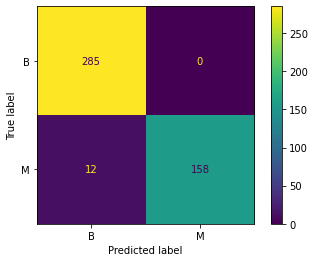

              precision    recall  f1-score   support

           B       0.96      1.00      0.98       285
           M       1.00      0.93      0.96       170

    accuracy                           0.97       455
   macro avg       0.98      0.96      0.97       455
weighted avg       0.97      0.97      0.97       455


Métricas de avaliação de teste:
[[71  1]
 [ 8 34]]


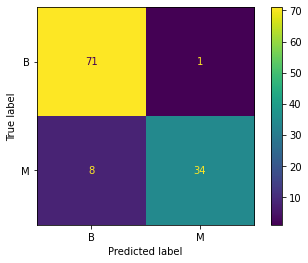

              precision    recall  f1-score   support

           B       0.90      0.99      0.94        72
           M       0.97      0.81      0.88        42

    accuracy                           0.92       114
   macro avg       0.94      0.90      0.91       114
weighted avg       0.93      0.92      0.92       114



In [26]:
# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = grid_rf.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))


# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = grid_rf.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

In [42]:
grid_rf.best_estimator_

Pipeline(steps=[('std_scaler', StandardScaler()),
                ('rf',
                 RandomForestClassifier(max_depth=3, max_features=1,
                                        n_estimators=150))])

## Exercício

2 -  Realize uma classificação usando o classificador de arvore de decisão, o dataset do titanic para prever se a pessoa sobreviveu ou não. Imprima a matriz de confusão e verifique se se modelo possui uma boa acurácia e precisão. Em seguida compare com os resultados com uma random forest

## Etapas:

1 - Carregue a base

2 - Verifique a necessidade de escalonamento

3 - Crie um pipeline e adicione o escalonamento (se necessário) e o estimador

4 - Faça o fit do modelo e verifique as métricas

5 - Replique para os demais estimadores

In [44]:
dt

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [27]:
titanic = sns.load_dataset('titanic')

In [31]:
dt = sns.load_dataset("titanic")

X = dt.select_dtypes(np.number).drop(columns=["survived", "age"]) # joguei fora "survived" porque é target e "age" porque tem muito nulo
y = dt["survived"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y)

lista_etapas = [("rf", RandomForestClassifier())]

pipe_rf = Pipeline(lista_etapas)

pipe_rf.fit(X_train, y_train)

Pipeline(steps=[('rf', RandomForestClassifier())])

In [43]:
X

,survived,pclass,sibsp,parch,fare
0,0,3,1,0,7.2500
1,1,1,1,0,71.2833
2,1,3,0,0,7.9250
3,1,1,1,0,53.1000
4,0,3,0,0,8.0500
...,...,...,...,...,...
886,0,2,0,0,13.0000
887,1,1,0,0,30.0000
888,0,3,1,2,23.4500
889,1,1,0,0,30.0000



Métricas de avaliação de treino:
[[404  35]
 [ 74 199]]


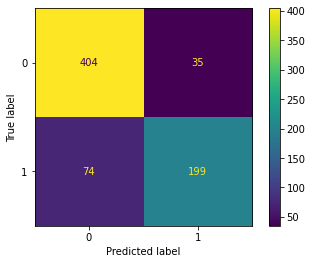

              precision    recall  f1-score   support

           0       0.85      0.92      0.88       439
           1       0.85      0.73      0.79       273

    accuracy                           0.85       712
   macro avg       0.85      0.82      0.83       712
weighted avg       0.85      0.85      0.84       712


Métricas de avaliação de teste:
[[93 17]
 [39 30]]


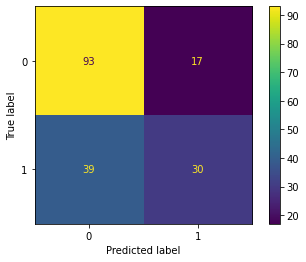

              precision    recall  f1-score   support

           0       0.70      0.85      0.77       110
           1       0.64      0.43      0.52        69

    accuracy                           0.69       179
   macro avg       0.67      0.64      0.64       179
weighted avg       0.68      0.69      0.67       179



In [34]:
# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = pipe_rf.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))


# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = pipe_rf.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

In [40]:
dt = sns.load_dataset("titanic")

X = dt.select_dtypes(np.number).drop(columns=["age"])

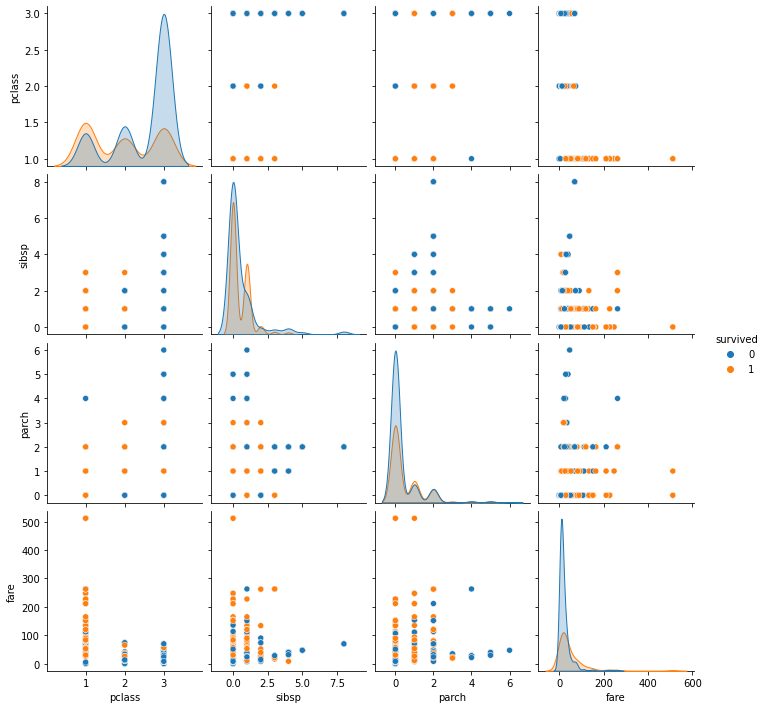

In [41]:
sns.pairplot(X, hue='survived')

_________
_______
_________

## 3) Boosting & AdaBoost

O AdaBoost significa **Adaptive Boosting**, e tem como procedimento geral **a criação sucessiva dos chamados weak learners**, que são modelos bem fracos de aprendizagem - geralmente, **árvores de um único nó (stumps)**.

<img src="https://miro.medium.com/max/1744/1*nJ5VrsiS1yaOR77d4h8gyw.png" width=300>

O AdaBoost utiliza os **erros da árvore anterior para melhorar a próxima árvore**. As predições finais são feitas com base **nos pesos de cada stump**, cuja determinação faz parte do algoritmo!

<img src="https://static.packt-cdn.com/products/9781788295758/graphics/image_04_046-1.png" width=700>

Vamos entender um pouco melhor...

Aqui, o bootstrapping não é utilizado: o método começa treinando um classificador fraco **no dataset original**, e depois treina diversas cópias adicionais do classificador **no mesmo dataset**, mas dando **um peso maior às observações que foram classificadas erroneamente** (ou, no caso de regressões, a observações **com o maior erro**).

Assim, após diversas iterações, classificadores/regressores vão sequencialmente "focando nos casos mais difíceis", e construindo um classificador encadeado que seja forte, apesar de utilizar diversos classificadores fracos em como elementos fundamentais.

<img src="https://www.researchgate.net/profile/Zhuo_Wang8/publication/288699540/figure/fig9/AS:668373486686246@1536364065786/Illustration-of-AdaBoost-algorithm-for-creating-a-strong-classifier-based-on-multiple.png" width=500>


De forma resumida, as principais ideias por trás deste algoritmo são:

- O algoritmo cria e combina um conjunto de **modelos fracos** (em geral, stumps);
- Cada stump é criado **levando em consideração os erros do stump anterior**;
- Alguns dos stumps têm **maior peso de decisão** do que outros na predição final;

As classes no sklearn são:

- [AdaBoostClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html)

- [AdaBoostRegressor](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostRegressor.html#sklearn.ensemble.AdaBoostRegressor)

Note que não há muitos hiperparâmetros. O mais importante, que deve ser tunado com o grid/random search, é:

- `n_estimators` : o número de weak learners encadeados;

Além disso, pode também ser interessante tunar os hiperparâmetros dos weak learners. Isso é possível de ser feito, como veremos a seguir!


Primeiro, vamos começar com nosso baseline:

In [45]:
from sklearn.ensemble import AdaBoostClassifier

In [46]:
df = pd.read_csv("breast_cancer.csv")

X = df.drop(columns=["diagnosis","id"])
y = df["diagnosis"]

X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=42,
                                                    stratify=y) ## Utilizamos quando há desbalanceamento
## Desbalanceamento -> Distribuição mais "enviesada" do que um 60% - 40%

# ====================

# argumento: um lista de tuplas do tipo [("nome da estrutura", classe instanciada da estrutura)]
# na sequencia em que as estruturas (procedimentos) são aplicadas
lista_etapas = [("std_scaler", StandardScaler()), 
                ("ab", AdaBoostClassifier(random_state=42))]

pipe_ab = Pipeline(lista_etapas).fit(X_train, y_train)


Métricas de avaliação de treino:
[[285   0]
 [  0 170]]


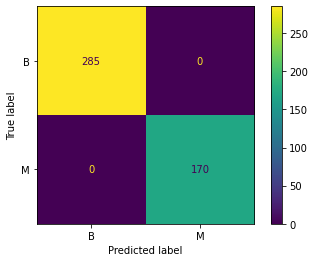

              precision    recall  f1-score   support

           B       1.00      1.00      1.00       285
           M       1.00      1.00      1.00       170

    accuracy                           1.00       455
   macro avg       1.00      1.00      1.00       455
weighted avg       1.00      1.00      1.00       455


Métricas de avaliação de teste:
[[71  1]
 [ 3 39]]


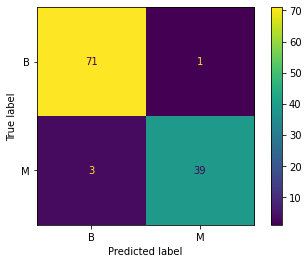

              precision    recall  f1-score   support

           B       0.96      0.99      0.97        72
           M       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



In [48]:
# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = pipe_ab.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))


# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = pipe_ab.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

## Exercício

3 - Com os dados do arquivo insurance.csv, divida os dados em três categorias de acordo com o preço (Faça um gráfico da idade pelo valor cobrado para ajudar na escolha dos intervalos). Faça uma classificação desses dados com todos os classificadores de árvore que vimos (RandomForest, Arvore de decisão simplese  Adaboost e compare os resultados.

## Etapas:

1 - Carregue a base

2 - Verifique a necessidade de escalonamento

3 - Crie um pipeline e adicione o escalonamento (se necessário) e o estimador

4 - Faça o fit do modelo e verifique as métricas

5 - Replique para os demais estimadores

In [68]:
df = pd.read_csv("insurance.csv")

In [69]:
df['flag_sex'] = np.where(df['sex'] == 'female', 1, 0)

In [70]:
df['is_smoker'] = np.where(df['smoker'] == 'yes', 1, 0)

In [71]:
df['target'] = np.where(df['charges'] < 10000, 0, np.where(df['charges'] < 30000, 1, 2))

In [72]:
df = df.drop(columns=['sex', 'smoker', 'region', 'charges'])

In [73]:
df

,age,bmi,children,flag_sex,is_smoker,target
0,19,27.900,0,1,1,1
1,18,33.770,1,0,0,0
2,28,33.000,3,0,0,0
3,33,22.705,0,0,0,1
4,32,28.880,0,0,0,0
...,...,...,...,...,...,...
1333,50,30.970,3,0,0,1
1334,18,31.920,0,1,0,0
1335,18,36.850,0,1,0,0
1336,21,25.800,0,1,0,0


In [74]:
X = df.drop('target', axis=1)
y = df['target']

In [76]:
y.value_counts(normalize=True)

0    0.532138
1    0.346786
2    0.121076
Name: target, dtype: float64

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    test_size=0.2, 
                                                    random_state=42,
                                                    stratify=y)

In [91]:
lista_etapas = [("dt", DecisionTreeClassifier())]

pipe_dt = Pipeline(lista_etapas)

splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

## ====================

metrica = make_scorer(f1_score, pos_label="f1")

## ====================

param_grid = {"dt__criterion" : ["gini", "entropy"],
              "dt__splitter" : ["best", "random"],
              "dt__max_depth" : range(4, 11)}

grid_dt = GridSearchCV(estimator=pipe_dt, 
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=splitter,
                        verbose=10)

grid_dt.fit(X_train, y_train)

Fitting 10 folds for each of 28 candidates, totalling 280 fits
[CV 1/10; 1/28] START dt__criterion=gini, dt__max_depth=4, dt__splitter=best....
[CV 1/10; 1/28] END dt__criterion=gini, dt__max_depth=4, dt__splitter=best;, score=nan total time=   0.0s
[CV 2/10; 1/28] START dt__criterion=gini, dt__max_depth=4, dt__splitter=best....
[CV 2/10; 1/28] END dt__criterion=gini, dt__max_depth=4, dt__splitter=best;, score=nan total time=   0.0s
[CV 3/10; 1/28] START dt__criterion=gini, dt__max_depth=4, dt__splitter=best....
[CV 3/10; 1/28] END dt__criterion=gini, dt__max_depth=4, dt__splitter=best;, score=nan total time=   0.0s
[CV 4/10; 1/28] START dt__criterion=gini, dt__max_depth=4, dt__splitter=best....
[CV 4/10; 1/28] END dt__criterion=gini, dt__max_depth=4, dt__splitter=best;, score=nan total time=   0.0s
[CV 5/10; 1/28] START dt__criterion=gini, dt__max_depth=4, dt__splitter=best....
[CV 5/10; 1/28] END dt__criterion=gini, dt__max_depth=4, dt__splitter=best;, score=nan total time=   0.0s
[C

[CV 7/10; 8/28] END dt__criterion=gini, dt__max_depth=7, dt__splitter=random;, score=nan total time=   0.0s
[CV 8/10; 8/28] START dt__criterion=gini, dt__max_depth=7, dt__splitter=random..
[CV 8/10; 8/28] END dt__criterion=gini, dt__max_depth=7, dt__splitter=random;, score=nan total time=   0.0s
[CV 9/10; 8/28] START dt__criterion=gini, dt__max_depth=7, dt__splitter=random..
[CV 9/10; 8/28] END dt__criterion=gini, dt__max_depth=7, dt__splitter=random;, score=nan total time=   0.0s
[CV 10/10; 8/28] START dt__criterion=gini, dt__max_depth=7, dt__splitter=random.
[CV 10/10; 8/28] END dt__criterion=gini, dt__max_depth=7, dt__splitter=random;, score=nan total time=   0.0s
[CV 1/10; 9/28] START dt__criterion=gini, dt__max_depth=8, dt__splitter=best....
[CV 1/10; 9/28] END dt__criterion=gini, dt__max_depth=8, dt__splitter=best;, score=nan total time=   0.0s
[CV 2/10; 9/28] START dt__criterion=gini, dt__max_depth=8, dt__splitter=best....
[CV 2/10; 9/28] END dt__criterion=gini, dt__max_depth=8,

[CV 10/10; 15/28] END dt__criterion=entropy, dt__max_depth=4, dt__splitter=best;, score=nan total time=   0.0s
[CV 1/10; 16/28] START dt__criterion=entropy, dt__max_depth=4, dt__splitter=random
[CV 1/10; 16/28] END dt__criterion=entropy, dt__max_depth=4, dt__splitter=random;, score=nan total time=   0.0s
[CV 2/10; 16/28] START dt__criterion=entropy, dt__max_depth=4, dt__splitter=random
[CV 2/10; 16/28] END dt__criterion=entropy, dt__max_depth=4, dt__splitter=random;, score=nan total time=   0.0s
[CV 3/10; 16/28] START dt__criterion=entropy, dt__max_depth=4, dt__splitter=random
[CV 3/10; 16/28] END dt__criterion=entropy, dt__max_depth=4, dt__splitter=random;, score=nan total time=   0.0s
[CV 4/10; 16/28] START dt__criterion=entropy, dt__max_depth=4, dt__splitter=random
[CV 4/10; 16/28] END dt__criterion=entropy, dt__max_depth=4, dt__splitter=random;, score=nan total time=   0.0s
[CV 5/10; 16/28] START dt__criterion=entropy, dt__max_depth=4, dt__splitter=random
[CV 5/10; 16/28] END dt__c

[CV 4/10; 22/28] END dt__criterion=entropy, dt__max_depth=7, dt__splitter=random;, score=nan total time=   0.0s
[CV 5/10; 22/28] START dt__criterion=entropy, dt__max_depth=7, dt__splitter=random
[CV 5/10; 22/28] END dt__criterion=entropy, dt__max_depth=7, dt__splitter=random;, score=nan total time=   0.0s
[CV 6/10; 22/28] START dt__criterion=entropy, dt__max_depth=7, dt__splitter=random
[CV 6/10; 22/28] END dt__criterion=entropy, dt__max_depth=7, dt__splitter=random;, score=nan total time=   0.0s
[CV 7/10; 22/28] START dt__criterion=entropy, dt__max_depth=7, dt__splitter=random
[CV 7/10; 22/28] END dt__criterion=entropy, dt__max_depth=7, dt__splitter=random;, score=nan total time=   0.0s
[CV 8/10; 22/28] START dt__criterion=entropy, dt__max_depth=7, dt__splitter=random
[CV 8/10; 22/28] END dt__criterion=entropy, dt__max_depth=7, dt__splitter=random;, score=nan total time=   0.0s
[CV 9/10; 22/28] START dt__criterion=entropy, dt__max_depth=7, dt__splitter=random
[CV 9/10; 22/28] END dt__

[CV 10/10; 28/28] END dt__criterion=entropy, dt__max_depth=10, dt__splitter=random;, score=nan total time=   0.0s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('dt', DecisionTreeClassifier())]),
             param_grid={'dt__criterion': ['gini', 'entropy'],
                         'dt__max_depth': range(4, 11),
                         'dt__splitter': ['best', 'random']},
             scoring=make_scorer(f1_score, pos_label=f1), verbose=10)

In [95]:
grid_dt.best_estimator_

Pipeline(steps=[('dt', DecisionTreeClassifier(max_depth=4))])


Métricas de avaliação de treino:
[[559  10   0]
 [ 54 317   0]
 [  1  12 117]]


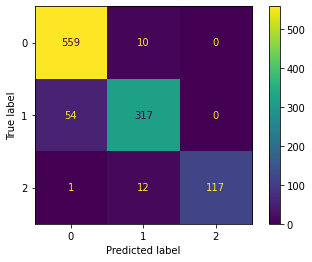

              precision    recall  f1-score   support

           0       0.91      0.98      0.95       569
           1       0.94      0.85      0.89       371
           2       1.00      0.90      0.95       130

    accuracy                           0.93      1070
   macro avg       0.95      0.91      0.93      1070
weighted avg       0.93      0.93      0.93      1070


Métricas de avaliação de teste:
[[139   4   0]
 [ 17  75   1]
 [  0   5  27]]


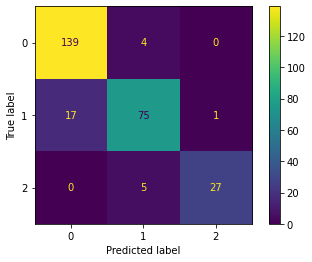

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       143
           1       0.89      0.81      0.85        93
           2       0.96      0.84      0.90        32

    accuracy                           0.90       268
   macro avg       0.92      0.87      0.89       268
weighted avg       0.90      0.90      0.90       268



In [94]:
# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = grid_dt.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))


# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = grid_dt.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

In [84]:
lista_etapas = [("rf", RandomForestClassifier())]

pipe_rf = Pipeline(lista_etapas)

splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

## ====================

metrica = make_scorer(f1_score, pos_label="f1")

## ====================

param_grid = {"rf__max_depth" : range(5, 10),
              "rf__max_features" : range(1, 5)}

grid_rf = GridSearchCV(estimator=pipe_rf, 
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=splitter,
                        verbose=10)

grid_rf.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV 1/10; 1/20] START rf__max_depth=5, rf__max_features=1.......................
[CV 1/10; 1/20] END rf__max_depth=5, rf__max_features=1;, score=nan total time=   0.0s
[CV 2/10; 1/20] START rf__max_depth=5, rf__max_features=1.......................
[CV 2/10; 1/20] END rf__max_depth=5, rf__max_features=1;, score=nan total time=   0.0s
[CV 3/10; 1/20] START rf__max_depth=5, rf__max_features=1.......................
[CV 3/10; 1/20] END rf__max_depth=5, rf__max_features=1;, score=nan total time=   0.0s
[CV 4/10; 1/20] START rf__max_depth=5, rf__max_features=1.......................
[CV 4/10; 1/20] END rf__max_depth=5, rf__max_features=1;, score=nan total time=   0.0s
[CV 5/10; 1/20] START rf__max_depth=5, rf__max_features=1.......................
[CV 5/10; 1/20] END rf__max_depth=5, rf__max_features=1;, score=nan total time=   0.0s
[CV 6/10; 1/20] START rf__max_depth=5, rf__max_features=1.......................
[CV 6/10; 1/20] 

[CV 10/10; 5/20] END rf__max_depth=6, rf__max_features=1;, score=nan total time=   0.0s
[CV 1/10; 6/20] START rf__max_depth=6, rf__max_features=2.......................
[CV 1/10; 6/20] END rf__max_depth=6, rf__max_features=2;, score=nan total time=   0.1s
[CV 2/10; 6/20] START rf__max_depth=6, rf__max_features=2.......................
[CV 2/10; 6/20] END rf__max_depth=6, rf__max_features=2;, score=nan total time=   0.1s
[CV 3/10; 6/20] START rf__max_depth=6, rf__max_features=2.......................
[CV 3/10; 6/20] END rf__max_depth=6, rf__max_features=2;, score=nan total time=   0.0s
[CV 4/10; 6/20] START rf__max_depth=6, rf__max_features=2.......................
[CV 4/10; 6/20] END rf__max_depth=6, rf__max_features=2;, score=nan total time=   0.0s
[CV 5/10; 6/20] START rf__max_depth=6, rf__max_features=2.......................
[CV 5/10; 6/20] END rf__max_depth=6, rf__max_features=2;, score=nan total time=   0.0s
[CV 6/10; 6/20] START rf__max_depth=6, rf__max_features=2...............

[CV 10/10; 10/20] END rf__max_depth=7, rf__max_features=2;, score=nan total time=   0.0s
[CV 1/10; 11/20] START rf__max_depth=7, rf__max_features=3......................
[CV 1/10; 11/20] END rf__max_depth=7, rf__max_features=3;, score=nan total time=   0.0s
[CV 2/10; 11/20] START rf__max_depth=7, rf__max_features=3......................
[CV 2/10; 11/20] END rf__max_depth=7, rf__max_features=3;, score=nan total time=   0.0s
[CV 3/10; 11/20] START rf__max_depth=7, rf__max_features=3......................
[CV 3/10; 11/20] END rf__max_depth=7, rf__max_features=3;, score=nan total time=   0.0s
[CV 4/10; 11/20] START rf__max_depth=7, rf__max_features=3......................
[CV 4/10; 11/20] END rf__max_depth=7, rf__max_features=3;, score=nan total time=   0.1s
[CV 5/10; 11/20] START rf__max_depth=7, rf__max_features=3......................
[CV 5/10; 11/20] END rf__max_depth=7, rf__max_features=3;, score=nan total time=   0.0s
[CV 6/10; 11/20] START rf__max_depth=7, rf__max_features=3........

[CV 10/10; 15/20] END rf__max_depth=8, rf__max_features=3;, score=nan total time=   0.0s
[CV 1/10; 16/20] START rf__max_depth=8, rf__max_features=4......................
[CV 1/10; 16/20] END rf__max_depth=8, rf__max_features=4;, score=nan total time=   0.0s
[CV 2/10; 16/20] START rf__max_depth=8, rf__max_features=4......................
[CV 2/10; 16/20] END rf__max_depth=8, rf__max_features=4;, score=nan total time=   0.1s
[CV 3/10; 16/20] START rf__max_depth=8, rf__max_features=4......................
[CV 3/10; 16/20] END rf__max_depth=8, rf__max_features=4;, score=nan total time=   0.1s
[CV 4/10; 16/20] START rf__max_depth=8, rf__max_features=4......................
[CV 4/10; 16/20] END rf__max_depth=8, rf__max_features=4;, score=nan total time=   0.1s
[CV 5/10; 16/20] START rf__max_depth=8, rf__max_features=4......................
[CV 5/10; 16/20] END rf__max_depth=8, rf__max_features=4;, score=nan total time=   0.1s
[CV 6/10; 16/20] START rf__max_depth=8, rf__max_features=4........

[CV 10/10; 20/20] END rf__max_depth=9, rf__max_features=4;, score=nan total time=   0.1s


GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('rf', RandomForestClassifier())]),
             param_grid={'rf__max_depth': range(5, 10),
                         'rf__max_features': range(1, 5)},
             scoring=make_scorer(f1_score, pos_label=f1), verbose=10)

In [97]:
grid_rf.best_estimator_

Pipeline(steps=[('rf', RandomForestClassifier(max_depth=5, max_features=1))])


Métricas de avaliação de treino:
[[565   4   0]
 [ 65 306   0]
 [  2  11 117]]


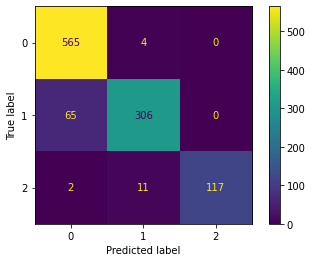

              precision    recall  f1-score   support

           0       0.89      0.99      0.94       569
           1       0.95      0.82      0.88       371
           2       1.00      0.90      0.95       130

    accuracy                           0.92      1070
   macro avg       0.95      0.91      0.92      1070
weighted avg       0.93      0.92      0.92      1070


Métricas de avaliação de teste:
[[140   3   0]
 [ 17  76   0]
 [  0   5  27]]


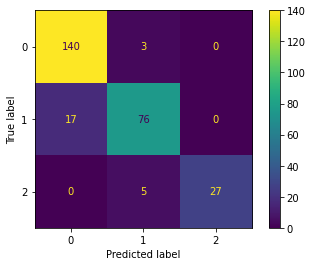

              precision    recall  f1-score   support

           0       0.89      0.98      0.93       143
           1       0.90      0.82      0.86        93
           2       1.00      0.84      0.92        32

    accuracy                           0.91       268
   macro avg       0.93      0.88      0.90       268
weighted avg       0.91      0.91      0.91       268



In [93]:
# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = grid_rf.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))


# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = grid_rf.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

In [88]:
lista_etapas = [("ab", AdaBoostClassifier())]

pipe_ab = Pipeline(lista_etapas)

splitter = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

## ====================

metrica = make_scorer(f1_score, pos_label="f1")

## ====================

param_grid = {"ab__n_estimators" : range(40, 60)}

grid_ab = GridSearchCV(estimator=pipe_ab, 
                        param_grid=param_grid,
                        scoring=metrica,
                        cv=splitter,
                        verbose=10)

grid_ab.fit(X_train, y_train)

Fitting 10 folds for each of 20 candidates, totalling 200 fits
[CV 1/10; 1/20] START ab__n_estimators=40.......................................
[CV 1/10; 1/20] END ..........ab__n_estimators=40;, score=nan total time=   0.0s
[CV 2/10; 1/20] START ab__n_estimators=40.......................................
[CV 2/10; 1/20] END ..........ab__n_estimators=40;, score=nan total time=   0.0s
[CV 3/10; 1/20] START ab__n_estimators=40.......................................
[CV 3/10; 1/20] END ..........ab__n_estimators=40;, score=nan total time=   0.0s
[CV 4/10; 1/20] START ab__n_estimators=40.......................................
[CV 4/10; 1/20] END ..........ab__n_estimators=40;, score=nan total time=   0.0s
[CV 5/10; 1/20] START ab__n_estimators=40.......................................
[CV 5/10; 1/20] END ..........ab__n_estimators=40;, score=nan total time=   0.0s
[CV 6/10; 1/20] START ab__n_estimators=40.......................................
[CV 6/10; 1/20] END ..........ab__n_estimators

[CV 1/10; 6/20] END ..........ab__n_estimators=45;, score=nan total time=   0.0s
[CV 2/10; 6/20] START ab__n_estimators=45.......................................
[CV 2/10; 6/20] END ..........ab__n_estimators=45;, score=nan total time=   0.0s
[CV 3/10; 6/20] START ab__n_estimators=45.......................................
[CV 3/10; 6/20] END ..........ab__n_estimators=45;, score=nan total time=   0.0s
[CV 4/10; 6/20] START ab__n_estimators=45.......................................
[CV 4/10; 6/20] END ..........ab__n_estimators=45;, score=nan total time=   0.0s
[CV 5/10; 6/20] START ab__n_estimators=45.......................................
[CV 5/10; 6/20] END ..........ab__n_estimators=45;, score=nan total time=   0.0s
[CV 6/10; 6/20] START ab__n_estimators=45.......................................
[CV 6/10; 6/20] END ..........ab__n_estimators=45;, score=nan total time=   0.0s
[CV 7/10; 6/20] START ab__n_estimators=45.......................................
[CV 7/10; 6/20] END ........

[CV 4/10; 11/20] END .........ab__n_estimators=50;, score=nan total time=   0.0s
[CV 5/10; 11/20] START ab__n_estimators=50......................................
[CV 5/10; 11/20] END .........ab__n_estimators=50;, score=nan total time=   0.0s
[CV 6/10; 11/20] START ab__n_estimators=50......................................
[CV 6/10; 11/20] END .........ab__n_estimators=50;, score=nan total time=   0.0s
[CV 7/10; 11/20] START ab__n_estimators=50......................................
[CV 7/10; 11/20] END .........ab__n_estimators=50;, score=nan total time=   0.0s
[CV 8/10; 11/20] START ab__n_estimators=50......................................
[CV 8/10; 11/20] END .........ab__n_estimators=50;, score=nan total time=   0.0s
[CV 9/10; 11/20] START ab__n_estimators=50......................................
[CV 9/10; 11/20] END .........ab__n_estimators=50;, score=nan total time=   0.0s
[CV 10/10; 11/20] START ab__n_estimators=50.....................................
[CV 10/10; 11/20] END ......

[CV 5/10; 16/20] END .........ab__n_estimators=55;, score=nan total time=   0.0s
[CV 6/10; 16/20] START ab__n_estimators=55......................................
[CV 6/10; 16/20] END .........ab__n_estimators=55;, score=nan total time=   0.0s
[CV 7/10; 16/20] START ab__n_estimators=55......................................
[CV 7/10; 16/20] END .........ab__n_estimators=55;, score=nan total time=   0.0s
[CV 8/10; 16/20] START ab__n_estimators=55......................................
[CV 8/10; 16/20] END .........ab__n_estimators=55;, score=nan total time=   0.0s
[CV 9/10; 16/20] START ab__n_estimators=55......................................
[CV 9/10; 16/20] END .........ab__n_estimators=55;, score=nan total time=   0.0s
[CV 10/10; 16/20] START ab__n_estimators=55.....................................
[CV 10/10; 16/20] END ........ab__n_estimators=55;, score=nan total time=   0.0s
[CV 1/10; 17/20] START ab__n_estimators=56......................................
[CV 1/10; 17/20] END .......

GridSearchCV(cv=StratifiedKFold(n_splits=10, random_state=42, shuffle=True),
             estimator=Pipeline(steps=[('ab', AdaBoostClassifier())]),
             param_grid={'ab__n_estimators': range(40, 60)},
             scoring=make_scorer(f1_score, pos_label=f1), verbose=10)

In [98]:
grid_ab.best_estimator_

Pipeline(steps=[('ab', AdaBoostClassifier(n_estimators=40))])


Métricas de avaliação de treino:
[[522  47   0]
 [ 56 259  56]
 [  1  50  79]]


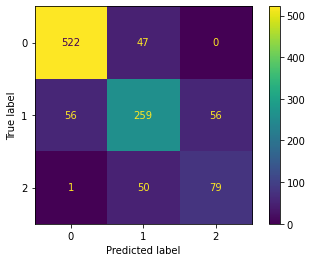

              precision    recall  f1-score   support

           0       0.90      0.92      0.91       569
           1       0.73      0.70      0.71       371
           2       0.59      0.61      0.60       130

    accuracy                           0.80      1070
   macro avg       0.74      0.74      0.74      1070
weighted avg       0.80      0.80      0.80      1070


Métricas de avaliação de teste:
[[129  14   0]
 [ 14  66  13]
 [  0  16  16]]


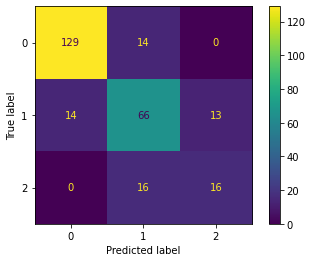

              precision    recall  f1-score   support

           0       0.90      0.90      0.90       143
           1       0.69      0.71      0.70        93
           2       0.55      0.50      0.52        32

    accuracy                           0.79       268
   macro avg       0.71      0.70      0.71       268
weighted avg       0.79      0.79      0.79       268



In [92]:
# ============================================

print("\nMétricas de avaliação de treino:")

y_pred_train = grid_ab.predict(X_train)

print(confusion_matrix(y_train, y_pred_train))

ConfusionMatrixDisplay.from_predictions(y_train, y_pred_train)
plt.show()

print(classification_report(y_train, y_pred_train))


# ============================================

print("\nMétricas de avaliação de teste:")

y_pred_test = grid_ab.predict(X_test)

print(confusion_matrix(y_test, y_pred_test))

ConfusionMatrixDisplay.from_predictions(y_test, y_pred_test)
plt.show()

print(classification_report(y_test, y_pred_test))

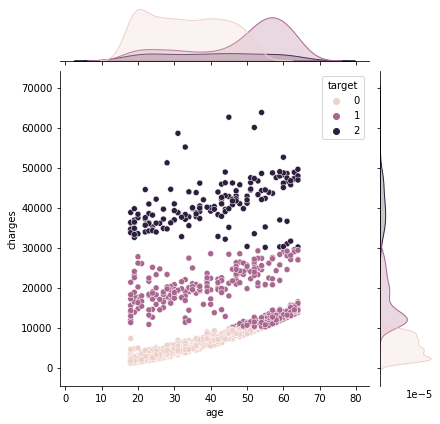

In [51]:
sns.jointplot(data=df, x='age', y='charges', hue='target')

_________
_______
_________